In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import time

from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from phik import phik_matrix

#wrapper methods
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

#imbalanced methods
from imblearn.pipeline import Pipeline as ImbPipeline

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import AllKNN

from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#scaler methods
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [2]:
X_train_binary_2 = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/Csv_after_cleaning/X_train_binary_2.csv', index_col='encounter_id')
X_val_binary_2 = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/Csv_after_cleaning/X_val_binary_2.csv', index_col='encounter_id')
y_train_binary_2 = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/Csv_after_cleaning/y_train_binary_2.csv', index_col='encounter_id')
y_val_binary_2 = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/Csv_after_cleaning/y_val_binary_2.csv', index_col='encounter_id')
test_binary_2 = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/Csv_after_cleaning/test_2.csv')

In [3]:
test_binary_2_copy = test_binary_2.copy() 

In [4]:
test_binary_2.shape

(30530, 54)

In [5]:
X_train_binary_2.shape

(53427, 53)

In [6]:
X_train_binary_2.drop(['payer_code_BC', 'payer_code_CP', 'payer_code_HM', 'payer_code_MC',
'payer_code_None', 'payer_code_UN', 'admission_type_Elective',  'discharge_disposition_Other',
'discharge_disposition_Transferred_to_another_medical_facility',
'admission_source_Emergency_Room', 'admission_source_Other_source',
'admission_source_Referral','glucose_test_result_High',
'glucose_test_result_Norm','glucose_test_result_Not_taken','Total_visits', 'Serious_condition_visits'], axis=1, inplace=True)
X_val_binary_2.drop(['payer_code_BC', 'payer_code_CP', 'payer_code_HM', 'payer_code_MC',
'payer_code_None', 'payer_code_UN', 'admission_type_Elective',  'discharge_disposition_Other',
'discharge_disposition_Transferred_to_another_medical_facility',
'admission_source_Emergency_Room', 'admission_source_Other_source',
'admission_source_Referral','glucose_test_result_High',
'glucose_test_result_Norm','glucose_test_result_Not_taken','Total_visits', 'Serious_condition_visits'], axis=1, inplace=True)
test_binary_2.drop(['payer_code_BC', 'payer_code_CP', 'payer_code_HM', 'payer_code_MC',
'payer_code_None', 'payer_code_UN', 'admission_type_Elective',  'discharge_disposition_Other',
'discharge_disposition_Transferred_to_another_medical_facility',
'admission_source_Emergency_Room', 'admission_source_Other_source',
'admission_source_Referral','glucose_test_result_High',
'glucose_test_result_Norm','glucose_test_result_Not_taken','Total_visits', 'Serious_condition_visits'], axis=1, inplace=True)

In [7]:
metric_features = ['average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
            'number_of_medications', 'number_diagnoses', 'number_generic_medications', 'outpatient_visits',
            'emergency_visits', 'inpatient_visits', 'Midpoint_Age', 'Total_visits', 'Serious_condition_visits']

In [8]:
y_train_binary_2 = y_train_binary_2[y_train_binary_2.columns[0]].map({'Yes': 1, 'No': 0})
y_val_binary_2 = y_val_binary_2[y_val_binary_2.columns[0]].map({'Yes': 1, 'No': 0})

In [9]:
min_max_before = MinMaxScaler()
X_train_min_max_before = min_max_before.fit_transform(X_train_binary_2)
X_val_min_max_before = min_max_before.transform(X_val_binary_2)

In [17]:
#no of features
nof_list=np.arange(15,25)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = RandomForestClassifier(class_weight='balanced',n_estimators=50,max_depth=5,random_state=19,n_jobs=-1)
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_min_max_before,y_train_binary_2)
    X_val_rfe = rfe.transform(X_val_min_max_before)
    model.fit(X_train_rfe,y_train_binary_2)
    
    #storing results on training data
    y_train_pred = model.predict(X_train_rfe)
    train_score = f1_score(y_train_binary_2, y_train_pred, average='binary')
    train_score_list.append(train_score)
    
    #storing results on validation data
    y_val_pred = model.predict(X_val_rfe)
    val_score = f1_score(y_val_binary_2, y_val_pred, average='binary')
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
    
    print("Selected Features: %s" % rfe.support_)
    print("Validation score:", val_score)
    print("Feature Ranking: %s" % rfe.ranking_)
    
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Selected Features: [False False False False False False False False False False  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False  True  True  True
 False  True  True False  True  True False  True False False  True False
 False False False  True  True]
Validation score: 0.2699372239014183
Feature Ranking: [32 38 25  8  2 18 22 35 23 37  1  1  1  1 26 36 31 11 19 15  4 30  9 28
 27 14 20 33 39 17 24 34 21  1  1  1  3  1  1  6  1  1 16  1  7 12  1 29
 10 13  5  1  1]
Selected Features: [False False False False  True False False False False False  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False  True  True  True
 False  True  True False  True  True False  True False False  True False
 False False False  True  True]
Validation score: 0.2714397234303558
Feature Ranking: [31 37 24  7  1 17 21 34 22 36  1  1  1  1 

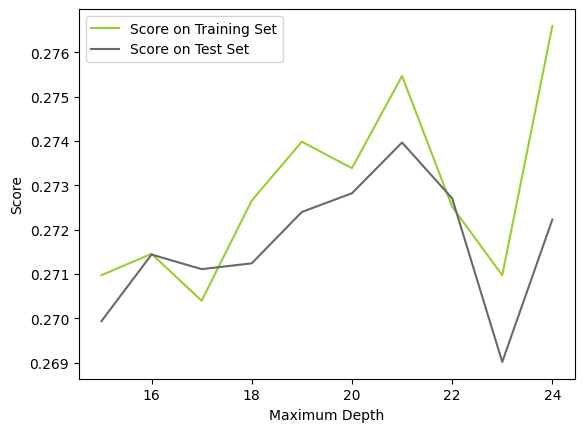

In [18]:
plt.plot(list(range(15,25)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(15,25)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [19]:
# No Feature Selection
rf = RandomForestClassifier(class_weight='balanced',n_estimators=50,max_depth=5,random_state=19, n_jobs=-1)
rf.fit(X_train_min_max_before, y_train_binary_2)

# Predict on training set and calculate F1 score
y_guess = rf.predict(X_train_min_max_before)
print("F1 Score (No Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rf.predict(X_val_min_max_before)
print("F1 Score (No Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

F1 Score (No Feature Selection) on train: 0.2800469680449551
F1 Score (No Feature Selection) on val: 0.27611468990779336


In [20]:
# Feature Selection with RFE
rfe = RFE(rf, n_features_to_select=22)
rfe.fit(X_train_min_max_before, y_train_binary_2)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_2.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_min_max_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_min_max_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

Selected Features: ['payer_code_MC', 'payer_code_None', 'discharge_disposition_Discharged_to_home', 'discharge_disposition_Expired', 'discharge_disposition_Other', 'discharge_disposition_Transferred_to_another_medical_facility', 'primary_diagnosis_types_Respiratory', 'outpatient_visits', 'emergency_visits', 'inpatient_visits', 'average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses', 'number_generic_medications', 'insulin', 'Midpoint_Age', 'Has_Insurance', 'Total_visits', 'Serious_condition_visits']
F1 Score (With Feature Selection) on train: 0.27251767018180445
F1 Score (With Feature Selection) on val: 0.27270647449096314


In [21]:
# Feature Selection with RFE
rfe = RFE(rf, n_features_to_select=15)
rfe.fit(X_train_min_max_before, y_train_binary_2)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_2.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_min_max_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_min_max_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

Selected Features: ['discharge_disposition_Discharged_to_home', 'discharge_disposition_Expired', 'discharge_disposition_Other', 'discharge_disposition_Transferred_to_another_medical_facility', 'outpatient_visits', 'emergency_visits', 'inpatient_visits', 'length_of_stay', 'number_lab_tests', 'number_of_medications', 'number_diagnoses', 'number_generic_medications', 'Midpoint_Age', 'Total_visits', 'Serious_condition_visits']
F1 Score (With Feature Selection) on train: 0.2709741856177013
F1 Score (With Feature Selection) on val: 0.2699372239014183


# Different total parameters given

In [25]:
#no of features
nof_list=np.arange(15,25)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = RandomForestClassifier(class_weight='balanced',n_estimators=50,max_depth=5,random_state=19,n_jobs=-1)
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_min_max_before,y_train_binary_2)
    X_val_rfe = rfe.transform(X_val_min_max_before)
    model.fit(X_train_rfe,y_train_binary_2)
    
    #storing results on training data
    y_train_pred = model.predict(X_train_rfe)
    train_score = f1_score(y_train_binary_2, y_train_pred, average='binary')
    train_score_list.append(train_score)
    
    #storing results on validation data
    y_val_pred = model.predict(X_val_rfe)
    val_score = f1_score(y_val_binary_2, y_val_pred, average='binary')
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
    
    print("Selected Features: %s" % rfe.support_)
    print("Validation score:", val_score)
    print("Feature Ranking: %s" % rfe.ranking_)
    
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Selected Features: [False False False  True  True False False False False False  True False
 False False False False False False  True  True  True  True  True  True
  True  True  True False  True  True False  True False False False False]
Validation score: 0.27179309548550973
Feature Ranking: [11 12 21  1  1  4 17  3 14 22  1 15 19  6 13  9 20 16  1  1  1  1  1  1
  1  1  1  7  1  1  2  1 18  5 10  8]
Selected Features: [False False False  True  True False False False False False  True False
 False False False False False False  True  True  True  True  True  True
  True  True  True False  True  True  True  True False False False False]
Validation score: 0.2699896157840083
Feature Ranking: [10 11 20  1  1  3 16  2 13 21  1 14 18  5 12  8 19 15  1  1  1  1  1  1
  1  1  1  6  1  1  1  1 17  4  9  7]
Selected Features: [False False False  True  True False False  True False False  True False
 False False False False False False  True  True  True  True  True  True
  True  True  True False  

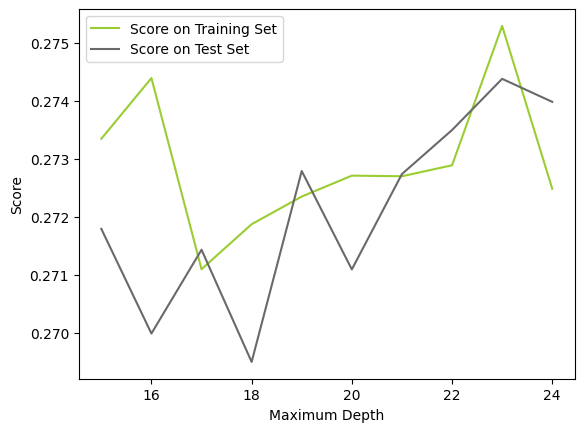

In [26]:
plt.plot(list(range(15,25)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(15,25)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [27]:
# No Feature Selection
rf = RandomForestClassifier(class_weight='balanced',n_estimators=50,max_depth=5,random_state=19, n_jobs=-1)
rf.fit(X_train_min_max_before, y_train_binary_2)

# Predict on training set and calculate F1 score
y_guess = rf.predict(X_train_min_max_before)
print("F1 Score (No Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rf.predict(X_val_min_max_before)
print("F1 Score (No Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

F1 Score (No Feature Selection) on train: 0.27484662576687113
F1 Score (No Feature Selection) on val: 0.2725095785440613


In [28]:
# Feature Selection with RFE
rfe = RFE(rf, n_features_to_select=22)
rfe.fit(X_train_min_max_before, y_train_binary_2)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_2.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_min_max_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_min_max_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

Selected Features: ['discharge_disposition_Discharged_to_home', 'discharge_disposition_Expired', 'primary_diagnosis_types_Diabetes', 'primary_diagnosis_types_Musculoskeletal', 'secondary_diagnosis_types_Neoplasms', 'additional_diagnosis_types_Neoplasms', 'outpatient_visits', 'emergency_visits', 'inpatient_visits', 'average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses', 'race_caucasian', 'number_generic_medications', 'insulin', 'metformin', 'Midpoint_Age', 'presc_diabetes_meds_binary', 'Has_Insurance']
F1 Score (With Feature Selection) on train: 0.2728889576244974
F1 Score (With Feature Selection) on val: 0.27349624060150374


In [29]:
# Feature Selection with RFE
rfe = RFE(rf, n_features_to_select=23)
rfe.fit(X_train_min_max_before, y_train_binary_2)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_2.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_min_max_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_min_max_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

Selected Features: ['discharge_disposition_Discharged_to_home', 'discharge_disposition_Expired', 'primary_diagnosis_types_Diabetes', 'primary_diagnosis_types_Musculoskeletal', 'secondary_diagnosis_types_Neoplasms', 'additional_diagnosis_types_Neoplasms', 'a1c_test_result_High', 'outpatient_visits', 'emergency_visits', 'inpatient_visits', 'average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses', 'race_caucasian', 'number_generic_medications', 'insulin', 'metformin', 'Midpoint_Age', 'presc_diabetes_meds_binary', 'Has_Insurance']
F1 Score (With Feature Selection) on train: 0.2752906063462143
F1 Score (With Feature Selection) on val: 0.27437858508604207


In [30]:
# Feature Selection with RFE
rfe = RFE(rf, n_features_to_select=24)
rfe.fit(X_train_min_max_before, y_train_binary_2)

# Get the selected features
selected_features = [f for f, s in zip(X_train_binary_2.columns, rfe.support_) if s]
print("Selected Features:", selected_features)

# Predict on training set and calculate F1 score
y_guess = rfe.predict(X_train_min_max_before)
print("F1 Score (With Feature Selection) on train:", f1_score(y_train_binary_2, y_guess))

# Predict on test set
y_score = rfe.predict(X_val_min_max_before)
print("F1 Score (With Feature Selection) on val:", f1_score(y_val_binary_2, y_score))

Selected Features: ['discharge_disposition_Discharged_to_home', 'discharge_disposition_Expired', 'primary_diagnosis_types_Diabetes', 'primary_diagnosis_types_Musculoskeletal', 'secondary_diagnosis_types_Neoplasms', 'additional_diagnosis_types_Neoplasms', 'a1c_test_result_High', 'outpatient_visits', 'emergency_visits', 'inpatient_visits', 'average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses', 'race_caucasian', 'number_generic_medications', 'insulin', 'metformin', 'Midpoint_Age', 'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance']
F1 Score (With Feature Selection) on train: 0.2724849592567207
F1 Score (With Feature Selection) on val: 0.27398213664308085


# Sequential Feature Selection 

In [123]:
# Sequential Feature Selection
model = RandomForestClassifier(class_weight='balanced',n_estimators=50,max_depth=5,random_state=19, n_jobs=-1)
sfs = SequentialFeatureSelector(model, k_features='best', scoring='f1', n_jobs=-1)
sfs.fit(X_train_min_max_before, y_train_binary_2)
# y_guess = sfs.predict(X_train)
features = list(sfs.k_feature_names_)
print(sfs.k_score_)

0.27052763206324126


In [124]:
model.fit(X_train_min_max_before, y_train_binary_2)
y_score = model.predict(X_val_min_max_before)

#save features
print("F1 score With Feature Selection:",f1_score(y_val_binary_2, y_score))
print('Selected features:', str(len(features)))

F1 score With Feature Selection: 0.2725095785440613
Selected features: 32


In [143]:
X_train_min_max_before

array([[0., 0., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 1.]])

In [144]:
X_train_binary_2.shape

(53424, 36)

In [131]:
features_indexes = [int(i) for i in features]  
features_names = X_train_binary_2.columns[features_indexes]
filtered_train = X_train_binary_2[features_names]
filtered_val = X_val_binary_2[features_names]
filtered_train.columns

Index(['admission_type_Urgent/Emergency', 'medical_specialty_Cardiology',
       'medical_specialty_Other_specialty',
       'discharge_disposition_Discharged_to_home',
       'discharge_disposition_Expired', 'primary_diagnosis_types_Diabetes',
       'primary_diagnosis_types_Injury',
       'primary_diagnosis_types_Musculoskeletal',
       'primary_diagnosis_types_Respiratory',
       'secondary_diagnosis_types_Diabetes',
       'secondary_diagnosis_types_Neoplasms',
       'additional_diagnosis_types_Diabetes',
       'additional_diagnosis_types_Genitourinary',
       'additional_diagnosis_types_Neoplasms',
       'additional_diagnosis_types_Other', 'a1c_test_result_High',
       'a1c_test_result_Not_taken', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'average_pulse_bpm', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'race_caucasian',
       'number_generic_medications', 'insulin', 'metformin', 'Midpoint_Age',
       'presc_diabetes

# Features Already Selected

In [ ]:
# selected_features=['emergency_visits','inpatient_visits','outpatient_visits','discharge_disposition_Discharged_to_home',
#                    'length_of_stay', 'non_lab_procedures', 'number_lab_tests', 'number_of_medications', 'number_diagnoses',
#                   'number_generic_medications', 'Midpoint_Age', 'discharge_disposition_Expired', 'medical_specialty_Cardiology',
#                   'primary_diagnosis_types_Diabetes', 'insulin', 'a1c_test_result_Not_taken', 'secondary_diagnosis_types_Neoplasms']

In [10]:
selected_features=['discharge_disposition_Discharged_to_home', 'discharge_disposition_Expired', 
                   'primary_diagnosis_types_Diabetes', 'primary_diagnosis_types_Musculoskeletal', 
                   'secondary_diagnosis_types_Neoplasms', 'additional_diagnosis_types_Neoplasms', 'a1c_test_result_High', 
                   'outpatient_visits', 'emergency_visits', 'inpatient_visits', 'average_pulse_bpm', 'length_of_stay', 
                   'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses', 'race_caucasian', 
                   'number_generic_medications', 'insulin', 'metformin', 'Midpoint_Age', 'presc_diabetes_meds_binary', 
                   'Has_Insurance']

In [362]:
# lr_selected_features=['medical_specialty_Cardiology', 'discharge_disposition_Discharged_to_home', 
#                       'discharge_disposition_Expired', 'primary_diagnosis_types_Diabetes', 
#                       'primary_diagnosis_types_Musculoskeletal', 'primary_diagnosis_types_Respiratory', 
#                       'secondary_diagnosis_types_Diabetes', 'secondary_diagnosis_types_Neoplasms', 
#                       'additional_diagnosis_types_Neoplasms', 'outpatient_visits', 'emergency_visits', 'inpatient_visits', 
#                       'non_lab_procedures', 'number_of_medications', 'number_diagnoses', 'race_caucasian', 
#                       'number_generic_medications', 'metformin', 'Midpoint_Age', 'presc_diabetes_meds_binary', 
#                       'Has_Insurance']

In [11]:
len(selected_features)

23

In [12]:
X_train_binary_2 = X_train_binary_2[selected_features]
X_val_binary_2 = X_val_binary_2[selected_features]
test_binary_2 = test_binary_2[selected_features]

In [13]:
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train_binary_2)
X_val_minmax = min_max_scaler.transform(X_val_binary_2)
test_minmax = min_max_scaler.transform(test_binary_2)

In [45]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.70, random_state=19)), ('model', RandomForestClassifier(n_estimators=50,max_depth=5,random_state=19,n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.236


In [46]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.80, random_state=19)), ('model', RandomForestClassifier(n_estimators=50,max_depth=5,random_state=19,n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.256


In [53]:
steps = [('under', RandomUnderSampler(sampling_strategy=0.9, random_state=19)), ('model', RandomForestClassifier(n_estimators=50,max_depth=5,random_state=19,n_jobs=-1))]
pipeline = ImbPipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=19)
scores = cross_val_score(pipeline, X_train_minmax, y_train_binary_2, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.269


# Randomized and Grid Search

In [149]:
# Define the models
models = [
    ('rf', RandomForestClassifier(random_state=19,n_jobs=-1))
]

# Define the hyperparameters  
hyperparameters = [
    {
        'rf__n_estimators': range(80,120),
        'rf__criterion': ['gini', 'entropy'],
        'rf__max_depth': [12],
        'rf__min_samples_split': range(90,120),
        'rf__min_samples_leaf': range(5,15)
    } # Random Forest
]


# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('Under', RandomUnderSampler(sampling_strategy=0.9, random_state=19)), model])
    
    # Initialize GridSearchCV
    gs = RandomizedSearchCV(pipeline, params, n_iter=200, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_minmax, y_train_binary_2)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    # Convert cv_results_ to a DataFrame and append to the list
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5; 1/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=116, rf__n_estimators=101
[CV 1/5; 1/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=116, rf__n_estimators=101;, score=0.273 total time=   0.1s
[CV 2/5; 1/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=116, rf__n_estimators=101
[CV 2/5; 1/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=116, rf__n_estimators=101;, score=0.264 total time=   0.1s
[CV 3/5; 1/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=116, rf__n_estimators=101
[CV 3/5; 1/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=116, rf__n_estimators=101;, score=0.275 total time=   0.1s
[CV 4/5; 1/200] START rf__c

[CV 3/5; 6/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=90, rf__n_estimators=119;, score=0.279 total time=   0.1s
[CV 4/5; 6/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=90, rf__n_estimators=119
[CV 4/5; 6/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=90, rf__n_estimators=119;, score=0.263 total time=   0.1s
[CV 5/5; 6/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=90, rf__n_estimators=119
[CV 5/5; 6/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=90, rf__n_estimators=119;, score=0.262 total time=   0.1s
[CV 1/5; 7/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=98, rf__n_estimators=89
[CV 1/5; 7/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=98, rf__n_estimato

[CV 1/5; 12/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=107, rf__n_estimators=106;, score=0.272 total time=   0.1s
[CV 2/5; 12/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=107, rf__n_estimators=106
[CV 2/5; 12/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=107, rf__n_estimators=106;, score=0.262 total time=   0.1s
[CV 3/5; 12/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=107, rf__n_estimators=106
[CV 3/5; 12/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=107, rf__n_estimators=106;, score=0.279 total time=   0.1s
[CV 4/5; 12/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=107, rf__n_estimators=106
[CV 4/5; 12/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=107,

[CV 4/5; 17/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=112, rf__n_estimators=89;, score=0.263 total time=   0.1s
[CV 5/5; 17/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=112, rf__n_estimators=89
[CV 5/5; 17/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=112, rf__n_estimators=89;, score=0.264 total time=   0.1s
[CV 1/5; 18/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=109, rf__n_estimators=119
[CV 1/5; 18/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=109, rf__n_estimators=119;, score=0.271 total time=   0.1s
[CV 2/5; 18/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=109, rf__n_estimators=119
[CV 2/5; 18/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=13, rf__

[CV 2/5; 23/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=116, rf__n_estimators=85;, score=0.265 total time=   0.1s
[CV 3/5; 23/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=116, rf__n_estimators=85
[CV 3/5; 23/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=116, rf__n_estimators=85;, score=0.277 total time=   0.1s
[CV 4/5; 23/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=116, rf__n_estimators=85
[CV 4/5; 23/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=116, rf__n_estimators=85;, score=0.263 total time=   0.1s
[CV 5/5; 23/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=116, rf__n_estimators=85
[CV 5/5; 23/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=116, rf__n

[CV 1/5; 29/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=107, rf__n_estimators=102;, score=0.274 total time=   0.1s
[CV 2/5; 29/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=107, rf__n_estimators=102
[CV 2/5; 29/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=107, rf__n_estimators=102;, score=0.263 total time=   0.1s
[CV 3/5; 29/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=107, rf__n_estimators=102
[CV 3/5; 29/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=107, rf__n_estimators=102;, score=0.278 total time=   0.1s
[CV 4/5; 29/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=107, rf__n_estimators=102
[CV 4/5; 29/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_spl

[CV 4/5; 34/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=91, rf__n_estimators=94;, score=0.275 total time=   0.1s
[CV 5/5; 34/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=91, rf__n_estimators=94
[CV 5/5; 34/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=91, rf__n_estimators=94;, score=0.267 total time=   0.1s
[CV 1/5; 35/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=114, rf__n_estimators=93
[CV 1/5; 35/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=114, rf__n_estimators=93;, score=0.274 total time=   0.1s
[CV 2/5; 35/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=114, rf__n_estimators=93
[CV 2/5; 35/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=1

[CV 2/5; 40/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=105, rf__n_estimators=104;, score=0.262 total time=   0.1s
[CV 3/5; 40/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=105, rf__n_estimators=104
[CV 3/5; 40/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=105, rf__n_estimators=104;, score=0.280 total time=   0.1s
[CV 4/5; 40/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=105, rf__n_estimators=104
[CV 4/5; 40/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=105, rf__n_estimators=104;, score=0.266 total time=   0.1s
[CV 5/5; 40/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=105, rf__n_estimators=104
[CV 5/5; 40/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=8, rf__m

[CV 5/5; 45/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=12, rf__min_samples_split=114, rf__n_estimators=118;, score=0.268 total time=   0.1s
[CV 1/5; 46/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=114, rf__n_estimators=100
[CV 1/5; 46/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=114, rf__n_estimators=100;, score=0.272 total time=   0.1s
[CV 2/5; 46/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=114, rf__n_estimators=100
[CV 2/5; 46/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=114, rf__n_estimators=100;, score=0.266 total time=   0.1s
[CV 3/5; 46/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=114, rf__n_estimators=100
[CV 3/5; 46/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=114

[CV 3/5; 51/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=98, rf__n_estimators=113;, score=0.278 total time=   0.1s
[CV 4/5; 51/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=98, rf__n_estimators=113
[CV 4/5; 51/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=98, rf__n_estimators=113;, score=0.261 total time=   0.1s
[CV 5/5; 51/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=98, rf__n_estimators=113
[CV 5/5; 51/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=98, rf__n_estimators=113;, score=0.267 total time=   0.2s
[CV 1/5; 52/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=115, rf__n_estimators=108
[CV 1/5; 52/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=115

[CV 1/5; 57/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=98, rf__n_estimators=98;, score=0.277 total time=   0.1s
[CV 2/5; 57/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=98, rf__n_estimators=98
[CV 2/5; 57/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=98, rf__n_estimators=98;, score=0.263 total time=   0.1s
[CV 3/5; 57/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=98, rf__n_estimators=98
[CV 3/5; 57/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=98, rf__n_estimators=98;, score=0.278 total time=   0.1s
[CV 4/5; 57/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=98, rf__n_estimators=98
[CV 4/5; 57/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=98, rf__n_estima

[CV 4/5; 62/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=111, rf__n_estimators=93;, score=0.267 total time=   0.1s
[CV 5/5; 62/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=111, rf__n_estimators=93
[CV 5/5; 62/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=111, rf__n_estimators=93;, score=0.264 total time=   0.1s
[CV 1/5; 63/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=101, rf__n_estimators=83
[CV 1/5; 63/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=101, rf__n_estimators=83;, score=0.275 total time=   0.1s
[CV 2/5; 63/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=101, rf__n_estimators=83
[CV 2/5; 63/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=1

[CV 2/5; 68/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=99, rf__n_estimators=119;, score=0.264 total time=   0.1s
[CV 3/5; 68/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=99, rf__n_estimators=119
[CV 3/5; 68/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=99, rf__n_estimators=119;, score=0.278 total time=   0.1s
[CV 4/5; 68/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=99, rf__n_estimators=119
[CV 4/5; 68/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=99, rf__n_estimators=119;, score=0.263 total time=   0.1s
[CV 5/5; 68/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=99, rf__n_estimators=119
[CV 5/5; 68/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=99,

[CV 1/5; 74/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=14, rf__min_samples_split=110, rf__n_estimators=95;, score=0.275 total time=   0.1s
[CV 2/5; 74/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=14, rf__min_samples_split=110, rf__n_estimators=95
[CV 2/5; 74/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=14, rf__min_samples_split=110, rf__n_estimators=95;, score=0.269 total time=   0.1s
[CV 3/5; 74/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=14, rf__min_samples_split=110, rf__n_estimators=95
[CV 3/5; 74/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=14, rf__min_samples_split=110, rf__n_estimators=95;, score=0.279 total time=   0.2s
[CV 4/5; 74/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=14, rf__min_samples_split=110, rf__n_estimators=95
[CV 4/5; 74/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=14, rf__

[CV 5/5; 79/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=110, rf__n_estimators=82;, score=0.262 total time=   0.1s
[CV 1/5; 80/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=112, rf__n_estimators=115
[CV 1/5; 80/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=112, rf__n_estimators=115;, score=0.275 total time=   0.1s
[CV 2/5; 80/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=112, rf__n_estimators=115
[CV 2/5; 80/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=112, rf__n_estimators=115;, score=0.266 total time=   0.1s
[CV 3/5; 80/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=112, rf__n_estimators=115
[CV 3/5; 80/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=13, 

[CV 3/5; 85/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=91, rf__n_estimators=104;, score=0.282 total time=   0.1s
[CV 4/5; 85/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=91, rf__n_estimators=104
[CV 4/5; 85/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=91, rf__n_estimators=104;, score=0.260 total time=   0.1s
[CV 5/5; 85/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=91, rf__n_estimators=104
[CV 5/5; 85/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=91, rf__n_estimators=104;, score=0.266 total time=   0.1s
[CV 1/5; 86/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=110, rf__n_estimators=107
[CV 1/5; 86/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=110, rf__

[CV 2/5; 91/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=14, rf__min_samples_split=99, rf__n_estimators=83;, score=0.267 total time=   0.1s
[CV 3/5; 91/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=14, rf__min_samples_split=99, rf__n_estimators=83
[CV 3/5; 91/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=14, rf__min_samples_split=99, rf__n_estimators=83;, score=0.281 total time=   0.1s
[CV 4/5; 91/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=14, rf__min_samples_split=99, rf__n_estimators=83
[CV 4/5; 91/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=14, rf__min_samples_split=99, rf__n_estimators=83;, score=0.262 total time=   0.1s
[CV 5/5; 91/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=14, rf__min_samples_split=99, rf__n_estimators=83
[CV 5/5; 91/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=14, rf__min_sa

[CV 5/5; 96/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=12, rf__min_samples_split=92, rf__n_estimators=93;, score=0.267 total time=   0.1s
[CV 1/5; 97/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=108, rf__n_estimators=105
[CV 1/5; 97/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=108, rf__n_estimators=105;, score=0.273 total time=   0.1s
[CV 2/5; 97/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=108, rf__n_estimators=105
[CV 2/5; 97/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=108, rf__n_estimators=105;, score=0.265 total time=   0.1s
[CV 3/5; 97/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=108, rf__n_estimators=105
[CV 3/5; 97/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=7, rf__mi

[CV 3/5; 102/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=106, rf__n_estimators=117;, score=0.281 total time=   0.1s
[CV 4/5; 102/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=106, rf__n_estimators=117
[CV 4/5; 102/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=106, rf__n_estimators=117;, score=0.268 total time=   0.2s
[CV 5/5; 102/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=106, rf__n_estimators=117
[CV 5/5; 102/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=106, rf__n_estimators=117;, score=0.264 total time=   0.1s
[CV 1/5; 103/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=94, rf__n_estimators=100
[CV 1/5; 103/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=1

[CV 1/5; 108/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=115, rf__n_estimators=106;, score=0.272 total time=   0.1s
[CV 2/5; 108/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=115, rf__n_estimators=106
[CV 2/5; 108/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=115, rf__n_estimators=106;, score=0.266 total time=   0.1s
[CV 3/5; 108/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=115, rf__n_estimators=106
[CV 3/5; 108/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=115, rf__n_estimators=106;, score=0.279 total time=   0.1s
[CV 4/5; 108/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=115, rf__n_estimators=106
[CV 4/5; 108/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_spl

[CV 4/5; 113/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=113, rf__n_estimators=108;, score=0.267 total time=   0.1s
[CV 5/5; 113/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=113, rf__n_estimators=108
[CV 5/5; 113/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=113, rf__n_estimators=108;, score=0.265 total time=   0.1s
[CV 1/5; 114/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=92, rf__n_estimators=116
[CV 1/5; 114/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=92, rf__n_estimators=116;, score=0.270 total time=   0.1s
[CV 2/5; 114/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=92, rf__n_estimators=116
[CV 2/5; 114/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=8

[CV 2/5; 119/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=11, rf__min_samples_split=93, rf__n_estimators=80;, score=0.264 total time=   0.1s
[CV 3/5; 119/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=11, rf__min_samples_split=93, rf__n_estimators=80
[CV 3/5; 119/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=11, rf__min_samples_split=93, rf__n_estimators=80;, score=0.283 total time=   0.1s
[CV 4/5; 119/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=11, rf__min_samples_split=93, rf__n_estimators=80
[CV 4/5; 119/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=11, rf__min_samples_split=93, rf__n_estimators=80;, score=0.266 total time=   0.1s
[CV 5/5; 119/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=11, rf__min_samples_split=93, rf__n_estimators=80
[CV 5/5; 119/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=11, rf_

[CV 5/5; 124/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=111, rf__n_estimators=105;, score=0.265 total time=   0.1s
[CV 1/5; 125/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=102, rf__n_estimators=107
[CV 1/5; 125/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=102, rf__n_estimators=107;, score=0.273 total time=   0.1s
[CV 2/5; 125/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=102, rf__n_estimators=107
[CV 2/5; 125/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=102, rf__n_estimators=107;, score=0.265 total time=   0.1s
[CV 3/5; 125/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=102, rf__n_estimators=107
[CV 3/5; 125/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_

[CV 4/5; 130/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=12, rf__min_samples_split=111, rf__n_estimators=109;, score=0.264 total time=   0.1s
[CV 5/5; 130/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=12, rf__min_samples_split=111, rf__n_estimators=109
[CV 5/5; 130/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=12, rf__min_samples_split=111, rf__n_estimators=109;, score=0.266 total time=   0.1s
[CV 1/5; 131/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=114, rf__n_estimators=113
[CV 1/5; 131/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=114, rf__n_estimators=113;, score=0.274 total time=   0.1s
[CV 2/5; 131/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=114, rf__n_estimators=113
[CV 2/5; 131/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf_

[CV 3/5; 136/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=101, rf__n_estimators=102;, score=0.280 total time=   0.1s
[CV 4/5; 136/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=101, rf__n_estimators=102
[CV 4/5; 136/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=101, rf__n_estimators=102;, score=0.271 total time=   0.3s
[CV 5/5; 136/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=101, rf__n_estimators=102
[CV 5/5; 136/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=101, rf__n_estimators=102;, score=0.264 total time=   0.1s
[CV 1/5; 137/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=107, rf__n_estimators=116
[CV 1/5; 137/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_

[CV 5/5; 141/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=94, rf__n_estimators=110;, score=0.271 total time=   0.1s
[CV 1/5; 142/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=92, rf__n_estimators=115
[CV 1/5; 142/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=92, rf__n_estimators=115;, score=0.275 total time=   0.1s
[CV 2/5; 142/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=92, rf__n_estimators=115
[CV 2/5; 142/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=92, rf__n_estimators=115;, score=0.265 total time=   0.1s
[CV 3/5; 142/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=92, rf__n_estimators=115
[CV 3/5; 142/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=7, rf_

[CV 3/5; 147/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=96, rf__n_estimators=111;, score=0.281 total time=   0.1s
[CV 4/5; 147/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=96, rf__n_estimators=111
[CV 4/5; 147/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=96, rf__n_estimators=111;, score=0.264 total time=   0.1s
[CV 5/5; 147/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=96, rf__n_estimators=111
[CV 5/5; 147/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=96, rf__n_estimators=111;, score=0.268 total time=   0.1s
[CV 1/5; 148/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=12, rf__min_samples_split=95, rf__n_estimators=82
[CV 1/5; 148/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=12, rf__min_s

[CV 2/5; 153/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=112, rf__n_estimators=100;, score=0.267 total time=   0.1s
[CV 3/5; 153/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=112, rf__n_estimators=100
[CV 3/5; 153/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=112, rf__n_estimators=100;, score=0.280 total time=   0.1s
[CV 4/5; 153/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=112, rf__n_estimators=100
[CV 4/5; 153/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=112, rf__n_estimators=100;, score=0.266 total time=   0.1s
[CV 5/5; 153/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=5, rf__min_samples_split=112, rf__n_estimators=100
[CV 5/5; 153/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=5

[CV 5/5; 158/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=14, rf__min_samples_split=96, rf__n_estimators=116;, score=0.268 total time=   0.1s
[CV 1/5; 159/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=110, rf__n_estimators=110
[CV 1/5; 159/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=110, rf__n_estimators=110;, score=0.273 total time=   0.1s
[CV 2/5; 159/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=110, rf__n_estimators=110
[CV 2/5; 159/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=110, rf__n_estimators=110;, score=0.268 total time=   0.1s
[CV 3/5; 159/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=110, rf__n_estimators=110
[CV 3/5; 159/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_sa

[CV 4/5; 164/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=11, rf__min_samples_split=101, rf__n_estimators=82;, score=0.268 total time=   0.1s
[CV 5/5; 164/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=11, rf__min_samples_split=101, rf__n_estimators=82
[CV 5/5; 164/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=11, rf__min_samples_split=101, rf__n_estimators=82;, score=0.266 total time=   0.1s
[CV 1/5; 165/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=109, rf__n_estimators=111
[CV 1/5; 165/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=109, rf__n_estimators=111;, score=0.273 total time=   0.1s
[CV 2/5; 165/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=109, rf__n_estimators=111
[CV 2/5; 165/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_sa

[CV 2/5; 170/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=116, rf__n_estimators=89;, score=0.265 total time=   0.1s
[CV 3/5; 170/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=116, rf__n_estimators=89
[CV 3/5; 170/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=116, rf__n_estimators=89;, score=0.276 total time=   0.1s
[CV 4/5; 170/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=116, rf__n_estimators=89
[CV 4/5; 170/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=116, rf__n_estimators=89;, score=0.266 total time=   0.1s
[CV 5/5; 170/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=116, rf__n_estimators=89
[CV 5/5; 170/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=116

[CV 5/5; 175/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=95, rf__n_estimators=98;, score=0.265 total time=   0.1s
[CV 1/5; 176/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=114, rf__n_estimators=82
[CV 1/5; 176/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=114, rf__n_estimators=82;, score=0.272 total time=   0.1s
[CV 2/5; 176/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=114, rf__n_estimators=82
[CV 2/5; 176/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=114, rf__n_estimators=82;, score=0.264 total time=   0.1s
[CV 3/5; 176/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=114, rf__n_estimators=82
[CV 3/5; 176/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=8, rf__min_samples_split=1

[CV 3/5; 181/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=101, rf__n_estimators=97;, score=0.277 total time=   0.1s
[CV 4/5; 181/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=101, rf__n_estimators=97
[CV 4/5; 181/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=101, rf__n_estimators=97;, score=0.270 total time=   0.1s
[CV 5/5; 181/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=101, rf__n_estimators=97
[CV 5/5; 181/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=101, rf__n_estimators=97;, score=0.264 total time=   0.1s
[CV 1/5; 182/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=6, rf__min_samples_split=103, rf__n_estimators=89
[CV 1/5; 182/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=6, rf__

[CV 1/5; 187/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=95, rf__n_estimators=119;, score=0.270 total time=   0.2s
[CV 2/5; 187/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=95, rf__n_estimators=119
[CV 2/5; 187/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=95, rf__n_estimators=119;, score=0.269 total time=   0.1s
[CV 3/5; 187/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=95, rf__n_estimators=119
[CV 3/5; 187/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=95, rf__n_estimators=119;, score=0.275 total time=   0.1s
[CV 4/5; 187/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_split=95, rf__n_estimators=119
[CV 4/5; 187/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=10, rf__min_samples_sp

[CV 5/5; 192/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=7, rf__min_samples_split=113, rf__n_estimators=85;, score=0.266 total time=   0.1s
[CV 1/5; 193/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=12, rf__min_samples_split=118, rf__n_estimators=116
[CV 1/5; 193/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=12, rf__min_samples_split=118, rf__n_estimators=116;, score=0.278 total time=   0.1s
[CV 2/5; 193/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=12, rf__min_samples_split=118, rf__n_estimators=116
[CV 2/5; 193/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=12, rf__min_samples_split=118, rf__n_estimators=116;, score=0.263 total time=   0.1s
[CV 3/5; 193/200] START rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=12, rf__min_samples_split=118, rf__n_estimators=116
[CV 3/5; 193/200] END rf__criterion=gini, rf__max_depth=12, rf__min_samples_leaf=12, rf__min_sample

[CV 3/5; 198/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=91, rf__n_estimators=85;, score=0.278 total time=   0.5s
[CV 4/5; 198/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=91, rf__n_estimators=85
[CV 4/5; 198/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=91, rf__n_estimators=85;, score=0.270 total time=   0.6s
[CV 5/5; 198/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=91, rf__n_estimators=85
[CV 5/5; 198/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=9, rf__min_samples_split=91, rf__n_estimators=85;, score=0.270 total time=   0.5s
[CV 1/5; 199/200] START rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=13, rf__min_samples_split=95, rf__n_estimators=115
[CV 1/5; 199/200] END rf__criterion=entropy, rf__max_depth=12, rf__min_samples_leaf=13, rf__min

In [150]:
test_scores_df

,best_score,best_params
0,0.272809,"{'rf__n_estimators': 96, 'rf__min_samples_spli..."


In [151]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)

In [152]:
cv_results_dfs[0].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__n_estimators,param_rf__min_samples_split,param_rf__min_samples_leaf,param_rf__max_depth,param_rf__criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
40,0.162159,0.009762,0.030413,0.001535,96,92,14,12,entropy,"{'rf__n_estimators': 96, 'rf__min_samples_spli...",0.272043,0.267212,0.281745,0.274286,0.268758,0.272809,0.005106,1
33,0.163949,0.008357,0.033857,0.003145,94,91,13,12,entropy,"{'rf__n_estimators': 94, 'rf__min_samples_spli...",0.273110,0.267781,0.279681,0.274853,0.267062,0.272497,0.004676,2
91,0.140276,0.008927,0.030751,0.005001,83,91,13,12,entropy,"{'rf__n_estimators': 83, 'rf__min_samples_spli...",0.272627,0.270002,0.281908,0.272628,0.264999,0.272433,0.005496,3
182,0.137484,0.007310,0.029965,0.004025,81,98,9,12,gini,"{'rf__n_estimators': 81, 'rf__min_samples_spli...",0.275423,0.269347,0.279905,0.267575,0.269060,0.272262,0.004672,4
192,0.190706,0.010799,0.035909,0.004149,116,118,12,12,gini,"{'rf__n_estimators': 116, 'rf__min_samples_spl...",0.278261,0.262887,0.279405,0.272384,0.268107,0.272209,0.006200,5


In [104]:
cv_results_dfs[0].to_csv('test_scores_df_rf_undersampling_7.csv', index = False, encoding='utf-8')

In [ ]:
# Define the models
models = [
    RandomForestClassifier(class_weight='balanced',random_state=19,n_jobs=-1)
]

# Define the hyperparameters  
hyperparameters = [
    {
        'n_estimators': [50, 75, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth': [8, 10, 12],
        'min_samples_split': [50, 75, 100],
        'min_samples_leaf': [2, 5, 10]
    } # Random Forest
]


# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    # pipeline = ImbPipeline([('Under', RandomUnderSampler(sampling_strategy=0.9, random_state=19)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(model, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_minmax, y_train_binary_2)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    # Convert cv_results_ to a DataFrame and append to the list
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

In [ ]:
test_scores_df

In [ ]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)

In [ ]:
cv_results_dfs[0].head()

In [71]:
cv_results_dfs[0].to_csv('test_scores_df_rf_classweight.csv', index = False, encoding='utf-8')

### Gradient Boosting Classifier

In [364]:
# Define the models
models = [
    ('gbc', GradientBoostingClassifier(random_state=19))
]

# Define the hyperparameters  
hyperparameters = [
    {
        'gbc__n_estimators': range(140,150),
        'gbc__max_depth': range(6,8),
        'gbc__min_samples_split': range(2,15),
        'gbc__min_samples_leaf': range(5,20),
        'gbc__learning_rate': [0.01],
        'gbc__subsample':[0.5, 0.75, 1.0]
    } # Random Forest
]

# params={"learning_rate": [1],
#      "min_samples_split": [50, 10, 2],
#        "min_samples_leaf": [1, 5, 10],
#        "max_depth":[3,4,5],
#        "subsample":[0.5, 1.0],
#        "n_estimators":[10, 50, 100],


# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('Under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), model])
    
    # Initialize GridSearchCV
    gs = RandomizedSearchCV(pipeline, params, n_iter=100, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_minmax, y_train_binary_2)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    # Convert cv_results_ to a DataFrame and append to the list
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5; 1/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=11, gbc__min_samples_split=3, gbc__n_estimators=145, gbc__subsample=0.75
[CV 1/5; 1/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=11, gbc__min_samples_split=3, gbc__n_estimators=145, gbc__subsample=0.75;, score=0.276 total time=   1.9s
[CV 2/5; 1/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=11, gbc__min_samples_split=3, gbc__n_estimators=145, gbc__subsample=0.75
[CV 2/5; 1/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=11, gbc__min_samples_split=3, gbc__n_estimators=145, gbc__subsample=0.75;, score=0.255 total time=   2.0s
[CV 3/5; 1/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=11, gbc__min_samples_split=3, gbc__n_estimators=145, gbc__subsample=0.75
[CV 3/5; 1/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_sam

[CV 4/5; 5/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=18, gbc__min_samples_split=7, gbc__n_estimators=141, gbc__subsample=1.0;, score=0.263 total time=   2.8s
[CV 5/5; 5/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=18, gbc__min_samples_split=7, gbc__n_estimators=141, gbc__subsample=1.0
[CV 5/5; 5/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=18, gbc__min_samples_split=7, gbc__n_estimators=141, gbc__subsample=1.0;, score=0.266 total time=   2.8s
[CV 1/5; 6/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=15, gbc__min_samples_split=8, gbc__n_estimators=148, gbc__subsample=0.75
[CV 1/5; 6/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=15, gbc__min_samples_split=8, gbc__n_estimators=148, gbc__subsample=0.75;, score=0.273 total time=   2.0s
[CV 2/5; 6/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=15, gbc__min_samples_sp

[CV 3/5; 10/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=7, gbc__min_samples_split=11, gbc__n_estimators=143, gbc__subsample=0.75;, score=0.272 total time=   2.1s
[CV 4/5; 10/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=7, gbc__min_samples_split=11, gbc__n_estimators=143, gbc__subsample=0.75
[CV 4/5; 10/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=7, gbc__min_samples_split=11, gbc__n_estimators=143, gbc__subsample=0.75;, score=0.269 total time=   2.0s
[CV 5/5; 10/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=7, gbc__min_samples_split=11, gbc__n_estimators=143, gbc__subsample=0.75
[CV 5/5; 10/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=7, gbc__min_samples_split=11, gbc__n_estimators=143, gbc__subsample=0.75;, score=0.267 total time=   2.0s
[CV 1/5; 11/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=18, gbc__min_s

[CV 2/5; 15/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=13, gbc__min_samples_split=11, gbc__n_estimators=145, gbc__subsample=1.0;, score=0.260 total time=   2.4s
[CV 3/5; 15/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=13, gbc__min_samples_split=11, gbc__n_estimators=145, gbc__subsample=1.0
[CV 3/5; 15/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=13, gbc__min_samples_split=11, gbc__n_estimators=145, gbc__subsample=1.0;, score=0.267 total time=   2.5s
[CV 4/5; 15/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=13, gbc__min_samples_split=11, gbc__n_estimators=145, gbc__subsample=1.0
[CV 4/5; 15/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=13, gbc__min_samples_split=11, gbc__n_estimators=145, gbc__subsample=1.0;, score=0.268 total time=   2.5s
[CV 5/5; 15/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=13, gbc__min_s

[CV 1/5; 20/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=17, gbc__min_samples_split=5, gbc__n_estimators=141, gbc__subsample=1.0;, score=0.272 total time=   2.3s
[CV 2/5; 20/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=17, gbc__min_samples_split=5, gbc__n_estimators=141, gbc__subsample=1.0
[CV 2/5; 20/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=17, gbc__min_samples_split=5, gbc__n_estimators=141, gbc__subsample=1.0;, score=0.258 total time=   2.3s
[CV 3/5; 20/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=17, gbc__min_samples_split=5, gbc__n_estimators=141, gbc__subsample=1.0
[CV 3/5; 20/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=17, gbc__min_samples_split=5, gbc__n_estimators=141, gbc__subsample=1.0;, score=0.267 total time=   2.4s
[CV 4/5; 20/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=17, gbc__min_sample

[CV 5/5; 24/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__min_samples_split=9, gbc__n_estimators=140, gbc__subsample=1.0;, score=0.260 total time=   2.5s
[CV 1/5; 25/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=12, gbc__min_samples_split=10, gbc__n_estimators=149, gbc__subsample=1.0
[CV 1/5; 25/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=12, gbc__min_samples_split=10, gbc__n_estimators=149, gbc__subsample=1.0;, score=0.270 total time=   2.5s
[CV 2/5; 25/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=12, gbc__min_samples_split=10, gbc__n_estimators=149, gbc__subsample=1.0
[CV 2/5; 25/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=12, gbc__min_samples_split=10, gbc__n_estimators=149, gbc__subsample=1.0;, score=0.262 total time=   2.5s
[CV 3/5; 25/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=12, gbc__min_sam

[CV 4/5; 29/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=15, gbc__min_samples_split=5, gbc__n_estimators=148, gbc__subsample=0.5;, score=0.267 total time=   1.9s
[CV 5/5; 29/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=15, gbc__min_samples_split=5, gbc__n_estimators=148, gbc__subsample=0.5
[CV 5/5; 29/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=15, gbc__min_samples_split=5, gbc__n_estimators=148, gbc__subsample=0.5;, score=0.269 total time=   1.8s
[CV 1/5; 30/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=8, gbc__min_samples_split=7, gbc__n_estimators=146, gbc__subsample=0.75
[CV 1/5; 30/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=8, gbc__min_samples_split=7, gbc__n_estimators=146, gbc__subsample=0.75;, score=0.273 total time=   2.5s
[CV 2/5; 30/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=8, gbc__min_samples

[CV 3/5; 34/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=10, gbc__min_samples_split=14, gbc__n_estimators=140, gbc__subsample=0.5;, score=0.281 total time=   1.5s
[CV 4/5; 34/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=10, gbc__min_samples_split=14, gbc__n_estimators=140, gbc__subsample=0.5
[CV 4/5; 34/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=10, gbc__min_samples_split=14, gbc__n_estimators=140, gbc__subsample=0.5;, score=0.272 total time=   1.5s
[CV 5/5; 34/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=10, gbc__min_samples_split=14, gbc__n_estimators=140, gbc__subsample=0.5
[CV 5/5; 34/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=10, gbc__min_samples_split=14, gbc__n_estimators=140, gbc__subsample=0.5;, score=0.265 total time=   1.5s
[CV 1/5; 35/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=18, gbc__min_s

[CV 2/5; 39/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=8, gbc__min_samples_split=12, gbc__n_estimators=142, gbc__subsample=0.5;, score=0.259 total time=   1.8s
[CV 3/5; 39/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=8, gbc__min_samples_split=12, gbc__n_estimators=142, gbc__subsample=0.5
[CV 3/5; 39/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=8, gbc__min_samples_split=12, gbc__n_estimators=142, gbc__subsample=0.5;, score=0.278 total time=   1.8s
[CV 4/5; 39/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=8, gbc__min_samples_split=12, gbc__n_estimators=142, gbc__subsample=0.5
[CV 4/5; 39/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=8, gbc__min_samples_split=12, gbc__n_estimators=142, gbc__subsample=0.5;, score=0.267 total time=   1.8s
[CV 5/5; 39/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=8, gbc__min_samples

[CV 1/5; 44/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=18, gbc__min_samples_split=7, gbc__n_estimators=146, gbc__subsample=0.5;, score=0.276 total time=   1.5s
[CV 2/5; 44/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=18, gbc__min_samples_split=7, gbc__n_estimators=146, gbc__subsample=0.5
[CV 2/5; 44/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=18, gbc__min_samples_split=7, gbc__n_estimators=146, gbc__subsample=0.5;, score=0.256 total time=   1.5s
[CV 3/5; 44/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=18, gbc__min_samples_split=7, gbc__n_estimators=146, gbc__subsample=0.5
[CV 3/5; 44/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=18, gbc__min_samples_split=7, gbc__n_estimators=146, gbc__subsample=0.5;, score=0.278 total time=   1.5s
[CV 4/5; 44/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=18, gbc__min_sample

[CV 5/5; 48/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=9, gbc__min_samples_split=5, gbc__n_estimators=140, gbc__subsample=0.75;, score=0.267 total time=   2.0s
[CV 1/5; 49/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=19, gbc__min_samples_split=10, gbc__n_estimators=145, gbc__subsample=1.0
[CV 1/5; 49/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=19, gbc__min_samples_split=10, gbc__n_estimators=145, gbc__subsample=1.0;, score=0.269 total time=   2.5s
[CV 2/5; 49/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=19, gbc__min_samples_split=10, gbc__n_estimators=145, gbc__subsample=1.0
[CV 2/5; 49/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=19, gbc__min_samples_split=10, gbc__n_estimators=145, gbc__subsample=1.0;, score=0.259 total time=   2.5s
[CV 3/5; 49/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=19, gbc__min_sa

[CV 4/5; 53/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=14, gbc__min_samples_split=9, gbc__n_estimators=145, gbc__subsample=1.0;, score=0.264 total time=   2.9s
[CV 5/5; 53/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=14, gbc__min_samples_split=9, gbc__n_estimators=145, gbc__subsample=1.0
[CV 5/5; 53/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=14, gbc__min_samples_split=9, gbc__n_estimators=145, gbc__subsample=1.0;, score=0.261 total time=   2.9s
[CV 1/5; 54/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=10, gbc__min_samples_split=4, gbc__n_estimators=141, gbc__subsample=0.5
[CV 1/5; 54/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=10, gbc__min_samples_split=4, gbc__n_estimators=141, gbc__subsample=0.5;, score=0.277 total time=   1.7s
[CV 2/5; 54/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=10, gbc__min_sample

[CV 3/5; 58/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=13, gbc__min_samples_split=14, gbc__n_estimators=149, gbc__subsample=1.0;, score=0.260 total time=   3.0s
[CV 4/5; 58/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=13, gbc__min_samples_split=14, gbc__n_estimators=149, gbc__subsample=1.0
[CV 4/5; 58/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=13, gbc__min_samples_split=14, gbc__n_estimators=149, gbc__subsample=1.0;, score=0.265 total time=   3.0s
[CV 5/5; 58/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=13, gbc__min_samples_split=14, gbc__n_estimators=149, gbc__subsample=1.0
[CV 5/5; 58/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=13, gbc__min_samples_split=14, gbc__n_estimators=149, gbc__subsample=1.0;, score=0.263 total time=   3.0s
[CV 1/5; 59/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=18, gbc__min_s

[CV 2/5; 63/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=17, gbc__min_samples_split=2, gbc__n_estimators=143, gbc__subsample=1.0;, score=0.259 total time=   2.8s
[CV 3/5; 63/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=17, gbc__min_samples_split=2, gbc__n_estimators=143, gbc__subsample=1.0
[CV 3/5; 63/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=17, gbc__min_samples_split=2, gbc__n_estimators=143, gbc__subsample=1.0;, score=0.262 total time=   2.9s
[CV 4/5; 63/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=17, gbc__min_samples_split=2, gbc__n_estimators=143, gbc__subsample=1.0
[CV 4/5; 63/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=17, gbc__min_samples_split=2, gbc__n_estimators=143, gbc__subsample=1.0;, score=0.263 total time=   2.9s
[CV 5/5; 63/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=17, gbc__min_sample

[CV 1/5; 68/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=16, gbc__min_samples_split=12, gbc__n_estimators=149, gbc__subsample=1.0;, score=0.267 total time=   2.5s
[CV 2/5; 68/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=16, gbc__min_samples_split=12, gbc__n_estimators=149, gbc__subsample=1.0
[CV 2/5; 68/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=16, gbc__min_samples_split=12, gbc__n_estimators=149, gbc__subsample=1.0;, score=0.261 total time=   2.5s
[CV 3/5; 68/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=16, gbc__min_samples_split=12, gbc__n_estimators=149, gbc__subsample=1.0
[CV 3/5; 68/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=16, gbc__min_samples_split=12, gbc__n_estimators=149, gbc__subsample=1.0;, score=0.269 total time=   2.5s
[CV 4/5; 68/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=16, gbc__min_s

[CV 5/5; 72/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=12, gbc__min_samples_split=13, gbc__n_estimators=142, gbc__subsample=0.75;, score=0.263 total time=   2.0s
[CV 1/5; 73/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__min_samples_split=7, gbc__n_estimators=145, gbc__subsample=0.75
[CV 1/5; 73/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__min_samples_split=7, gbc__n_estimators=145, gbc__subsample=0.75;, score=0.276 total time=   2.0s
[CV 2/5; 73/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__min_samples_split=7, gbc__n_estimators=145, gbc__subsample=0.75
[CV 2/5; 73/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__min_samples_split=7, gbc__n_estimators=145, gbc__subsample=0.75;, score=0.257 total time=   2.1s
[CV 3/5; 73/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=5, gbc__min_sampl

[CV 4/5; 77/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=16, gbc__min_samples_split=4, gbc__n_estimators=142, gbc__subsample=0.75;, score=0.261 total time=   1.9s
[CV 5/5; 77/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=16, gbc__min_samples_split=4, gbc__n_estimators=142, gbc__subsample=0.75
[CV 5/5; 77/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=16, gbc__min_samples_split=4, gbc__n_estimators=142, gbc__subsample=0.75;, score=0.265 total time=   2.0s
[CV 1/5; 78/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=9, gbc__min_samples_split=9, gbc__n_estimators=148, gbc__subsample=0.5
[CV 1/5; 78/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=9, gbc__min_samples_split=9, gbc__n_estimators=148, gbc__subsample=0.5;, score=0.275 total time=   1.9s
[CV 2/5; 78/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=9, gbc__min_sample

[CV 3/5; 82/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=17, gbc__min_samples_split=9, gbc__n_estimators=145, gbc__subsample=0.75;, score=0.273 total time=   2.0s
[CV 4/5; 82/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=17, gbc__min_samples_split=9, gbc__n_estimators=145, gbc__subsample=0.75
[CV 4/5; 82/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=17, gbc__min_samples_split=9, gbc__n_estimators=145, gbc__subsample=0.75;, score=0.264 total time=   2.0s
[CV 5/5; 82/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=17, gbc__min_samples_split=9, gbc__n_estimators=145, gbc__subsample=0.75
[CV 5/5; 82/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=17, gbc__min_samples_split=9, gbc__n_estimators=145, gbc__subsample=0.75;, score=0.264 total time=   2.0s
[CV 1/5; 83/100] START gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=8, gbc__min_sa

[CV 2/5; 87/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=7, gbc__min_samples_split=3, gbc__n_estimators=142, gbc__subsample=0.5;, score=0.261 total time=   1.8s
[CV 3/5; 87/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=7, gbc__min_samples_split=3, gbc__n_estimators=142, gbc__subsample=0.5
[CV 3/5; 87/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=7, gbc__min_samples_split=3, gbc__n_estimators=142, gbc__subsample=0.5;, score=0.277 total time=   1.8s
[CV 4/5; 87/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=7, gbc__min_samples_split=3, gbc__n_estimators=142, gbc__subsample=0.5
[CV 4/5; 87/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=7, gbc__min_samples_split=3, gbc__n_estimators=142, gbc__subsample=0.5;, score=0.268 total time=   1.8s
[CV 5/5; 87/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=7, gbc__min_samples_spli

[CV 1/5; 92/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=8, gbc__min_samples_split=4, gbc__n_estimators=143, gbc__subsample=0.75;, score=0.272 total time=   2.4s
[CV 2/5; 92/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=8, gbc__min_samples_split=4, gbc__n_estimators=143, gbc__subsample=0.75
[CV 2/5; 92/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=8, gbc__min_samples_split=4, gbc__n_estimators=143, gbc__subsample=0.75;, score=0.256 total time=   2.4s
[CV 3/5; 92/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=8, gbc__min_samples_split=4, gbc__n_estimators=143, gbc__subsample=0.75
[CV 3/5; 92/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=8, gbc__min_samples_split=4, gbc__n_estimators=143, gbc__subsample=0.75;, score=0.268 total time=   2.4s
[CV 4/5; 92/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=8, gbc__min_samples

[CV 5/5; 96/100] END gbc__learning_rate=0.01, gbc__max_depth=6, gbc__min_samples_leaf=18, gbc__min_samples_split=3, gbc__n_estimators=146, gbc__subsample=1.0;, score=0.264 total time=   2.4s
[CV 1/5; 97/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=19, gbc__min_samples_split=5, gbc__n_estimators=143, gbc__subsample=0.75
[CV 1/5; 97/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=19, gbc__min_samples_split=5, gbc__n_estimators=143, gbc__subsample=0.75;, score=0.273 total time=   2.3s
[CV 2/5; 97/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=19, gbc__min_samples_split=5, gbc__n_estimators=143, gbc__subsample=0.75
[CV 2/5; 97/100] END gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=19, gbc__min_samples_split=5, gbc__n_estimators=143, gbc__subsample=0.75;, score=0.254 total time=   2.4s
[CV 3/5; 97/100] START gbc__learning_rate=0.01, gbc__max_depth=7, gbc__min_samples_leaf=19, gbc__min_sa

In [365]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)

In [366]:
cv_results_dfs[0].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gbc__subsample,param_gbc__n_estimators,param_gbc__min_samples_split,param_gbc__min_samples_leaf,param_gbc__max_depth,param_gbc__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,1.902112,0.013822,0.047415,0.002897,0.5,143,3,6,7,0.01,"{'gbc__subsample': 0.5, 'gbc__n_estimators': 1...",0.278600,0.260599,0.277553,0.270882,0.263628,0.270252,0.007217,1
83,1.562367,0.005049,0.039810,0.003113,0.5,143,5,12,6,0.01,"{'gbc__subsample': 0.5, 'gbc__n_estimators': 1...",0.273634,0.258852,0.280837,0.270813,0.266029,0.270033,0.007367,2
74,1.875941,0.014627,0.043113,0.001255,0.5,140,9,5,7,0.01,"{'gbc__subsample': 0.5, 'gbc__n_estimators': 1...",0.279763,0.260744,0.272115,0.270270,0.265026,0.269584,0.006472,3
78,1.631582,0.002265,0.039154,0.002882,0.5,147,4,6,6,0.01,"{'gbc__subsample': 0.5, 'gbc__n_estimators': 1...",0.274232,0.257517,0.277358,0.270962,0.267139,0.269442,0.006862,4
43,1.555876,0.012272,0.039456,0.001435,0.5,146,7,18,6,0.01,"{'gbc__subsample': 0.5, 'gbc__n_estimators': 1...",0.275682,0.255961,0.277885,0.268095,0.269277,0.269380,0.007665,5


In [367]:
test_scores_df

,best_score,best_params
0,0.270252,"{'gbc__subsample': 0.5, 'gbc__n_estimators': 1..."


In [368]:
cv_results_dfs[0].to_csv('test_scores_df_gb_undersampling_3.csv', index = False, encoding='utf-8')

### HistGradientBoostingClassifier (Similar to LightGBM)

In [15]:
# Define the models
models = [
    ('hgbc', HistGradientBoostingClassifier(random_state=19))
]

# Define the hyperparameters  
hyperparameters = [
    {
        'hgbc__learning_rate': [0.01,0.1,0.2,0.3],
        'hgbc__max_iter': [100,200,400,600,800,1000],
        'hgbc__l2_regularization': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
        'hgbc__max_depth': range(2,50),
        'hgbc__max_leaf_nodes': range(2,200),
        'hgbc__min_samples_leaf': range(2,200)
    } # Random Forest
]


# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('Under', RandomUnderSampler(sampling_strategy=0.85, random_state=19)), model])
    
    # Initialize GridSearchCV
    gs = RandomizedSearchCV(pipeline, params, n_iter=200, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_minmax, y_train_binary_2)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    # Convert cv_results_ to a DataFrame and append to the list
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5; 1/200] START hgbc__l2_regularization=0.4, hgbc__learning_rate=0.3, hgbc__max_depth=31, hgbc__max_iter=1000, hgbc__max_leaf_nodes=55, hgbc__min_samples_leaf=145
[CV 1/5; 1/200] END hgbc__l2_regularization=0.4, hgbc__learning_rate=0.3, hgbc__max_depth=31, hgbc__max_iter=1000, hgbc__max_leaf_nodes=55, hgbc__min_samples_leaf=145;, score=0.252 total time=   1.0s
[CV 2/5; 1/200] START hgbc__l2_regularization=0.4, hgbc__learning_rate=0.3, hgbc__max_depth=31, hgbc__max_iter=1000, hgbc__max_leaf_nodes=55, hgbc__min_samples_leaf=145
[CV 2/5; 1/200] END hgbc__l2_regularization=0.4, hgbc__learning_rate=0.3, hgbc__max_depth=31, hgbc__max_iter=1000, hgbc__max_leaf_nodes=55, hgbc__min_samples_leaf=145;, score=0.249 total time=   0.2s
[CV 3/5; 1/200] START hgbc__l2_regularization=0.4, hgbc__learning_rate=0.3, hgbc__max_depth=31, hgbc__max_iter=1000, hgbc__max_leaf_nodes=55, hgbc__min_samples_leaf=145
[CV 3/5; 1/200] END hgbc__l2_

[CV 3/5; 5/200] END hgbc__l2_regularization=0.4, hgbc__learning_rate=0.01, hgbc__max_depth=35, hgbc__max_iter=800, hgbc__max_leaf_nodes=21, hgbc__min_samples_leaf=72;, score=0.274 total time=   2.1s
[CV 4/5; 5/200] START hgbc__l2_regularization=0.4, hgbc__learning_rate=0.01, hgbc__max_depth=35, hgbc__max_iter=800, hgbc__max_leaf_nodes=21, hgbc__min_samples_leaf=72
[CV 4/5; 5/200] END hgbc__l2_regularization=0.4, hgbc__learning_rate=0.01, hgbc__max_depth=35, hgbc__max_iter=800, hgbc__max_leaf_nodes=21, hgbc__min_samples_leaf=72;, score=0.264 total time=   4.3s
[CV 5/5; 5/200] START hgbc__l2_regularization=0.4, hgbc__learning_rate=0.01, hgbc__max_depth=35, hgbc__max_iter=800, hgbc__max_leaf_nodes=21, hgbc__min_samples_leaf=72
[CV 5/5; 5/200] END hgbc__l2_regularization=0.4, hgbc__learning_rate=0.01, hgbc__max_depth=35, hgbc__max_iter=800, hgbc__max_leaf_nodes=21, hgbc__min_samples_leaf=72;, score=0.264 total time=   2.9s
[CV 1/5; 6/200] START hgbc__l2_regularization=0.9, hgbc__learning_r

[CV 1/5; 10/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.01, hgbc__max_depth=10, hgbc__max_iter=800, hgbc__max_leaf_nodes=108, hgbc__min_samples_leaf=181;, score=0.276 total time=   2.8s
[CV 2/5; 10/200] START hgbc__l2_regularization=0.9, hgbc__learning_rate=0.01, hgbc__max_depth=10, hgbc__max_iter=800, hgbc__max_leaf_nodes=108, hgbc__min_samples_leaf=181
[CV 2/5; 10/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.01, hgbc__max_depth=10, hgbc__max_iter=800, hgbc__max_leaf_nodes=108, hgbc__min_samples_leaf=181;, score=0.250 total time=   3.3s
[CV 3/5; 10/200] START hgbc__l2_regularization=0.9, hgbc__learning_rate=0.01, hgbc__max_depth=10, hgbc__max_iter=800, hgbc__max_leaf_nodes=108, hgbc__min_samples_leaf=181
[CV 3/5; 10/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.01, hgbc__max_depth=10, hgbc__max_iter=800, hgbc__max_leaf_nodes=108, hgbc__min_samples_leaf=181;, score=0.264 total time=   3.3s
[CV 4/5; 10/200] START hgbc__l2_regularization=0.9, 

[CV 4/5; 14/200] END hgbc__l2_regularization=0.3, hgbc__learning_rate=0.2, hgbc__max_depth=29, hgbc__max_iter=200, hgbc__max_leaf_nodes=47, hgbc__min_samples_leaf=190;, score=0.246 total time=   0.4s
[CV 5/5; 14/200] START hgbc__l2_regularization=0.3, hgbc__learning_rate=0.2, hgbc__max_depth=29, hgbc__max_iter=200, hgbc__max_leaf_nodes=47, hgbc__min_samples_leaf=190
[CV 5/5; 14/200] END hgbc__l2_regularization=0.3, hgbc__learning_rate=0.2, hgbc__max_depth=29, hgbc__max_iter=200, hgbc__max_leaf_nodes=47, hgbc__min_samples_leaf=190;, score=0.256 total time=   0.2s
[CV 1/5; 15/200] START hgbc__l2_regularization=0.3, hgbc__learning_rate=0.2, hgbc__max_depth=29, hgbc__max_iter=400, hgbc__max_leaf_nodes=163, hgbc__min_samples_leaf=190
[CV 1/5; 15/200] END hgbc__l2_regularization=0.3, hgbc__learning_rate=0.2, hgbc__max_depth=29, hgbc__max_iter=400, hgbc__max_leaf_nodes=163, hgbc__min_samples_leaf=190;, score=0.261 total time=   0.2s
[CV 2/5; 15/200] START hgbc__l2_regularization=0.3, hgbc__le

[CV 2/5; 19/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.1, hgbc__max_depth=39, hgbc__max_iter=600, hgbc__max_leaf_nodes=105, hgbc__min_samples_leaf=195;, score=0.255 total time=   0.3s
[CV 3/5; 19/200] START hgbc__l2_regularization=0.9, hgbc__learning_rate=0.1, hgbc__max_depth=39, hgbc__max_iter=600, hgbc__max_leaf_nodes=105, hgbc__min_samples_leaf=195
[CV 3/5; 19/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.1, hgbc__max_depth=39, hgbc__max_iter=600, hgbc__max_leaf_nodes=105, hgbc__min_samples_leaf=195;, score=0.258 total time=   0.4s
[CV 4/5; 19/200] START hgbc__l2_regularization=0.9, hgbc__learning_rate=0.1, hgbc__max_depth=39, hgbc__max_iter=600, hgbc__max_leaf_nodes=105, hgbc__min_samples_leaf=195
[CV 4/5; 19/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.1, hgbc__max_depth=39, hgbc__max_iter=600, hgbc__max_leaf_nodes=105, hgbc__min_samples_leaf=195;, score=0.253 total time=   0.5s
[CV 5/5; 19/200] START hgbc__l2_regularization=0.9, hgbc_

[CV 5/5; 23/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.01, hgbc__max_depth=2, hgbc__max_iter=600, hgbc__max_leaf_nodes=20, hgbc__min_samples_leaf=2;, score=0.266 total time=   1.2s
[CV 1/5; 24/200] START hgbc__l2_regularization=0.7, hgbc__learning_rate=0.3, hgbc__max_depth=5, hgbc__max_iter=100, hgbc__max_leaf_nodes=117, hgbc__min_samples_leaf=27
[CV 1/5; 24/200] END hgbc__l2_regularization=0.7, hgbc__learning_rate=0.3, hgbc__max_depth=5, hgbc__max_iter=100, hgbc__max_leaf_nodes=117, hgbc__min_samples_leaf=27;, score=0.271 total time=   0.1s
[CV 2/5; 24/200] START hgbc__l2_regularization=0.7, hgbc__learning_rate=0.3, hgbc__max_depth=5, hgbc__max_iter=100, hgbc__max_leaf_nodes=117, hgbc__min_samples_leaf=27
[CV 2/5; 24/200] END hgbc__l2_regularization=0.7, hgbc__learning_rate=0.3, hgbc__max_depth=5, hgbc__max_iter=100, hgbc__max_leaf_nodes=117, hgbc__min_samples_leaf=27;, score=0.263 total time=   0.0s
[CV 3/5; 24/200] START hgbc__l2_regularization=0.7, hgbc__learning_r

[CV 3/5; 28/200] END hgbc__l2_regularization=0.8, hgbc__learning_rate=0.3, hgbc__max_depth=31, hgbc__max_iter=800, hgbc__max_leaf_nodes=113, hgbc__min_samples_leaf=161;, score=0.255 total time=   0.2s
[CV 4/5; 28/200] START hgbc__l2_regularization=0.8, hgbc__learning_rate=0.3, hgbc__max_depth=31, hgbc__max_iter=800, hgbc__max_leaf_nodes=113, hgbc__min_samples_leaf=161
[CV 4/5; 28/200] END hgbc__l2_regularization=0.8, hgbc__learning_rate=0.3, hgbc__max_depth=31, hgbc__max_iter=800, hgbc__max_leaf_nodes=113, hgbc__min_samples_leaf=161;, score=0.247 total time=   0.3s
[CV 5/5; 28/200] START hgbc__l2_regularization=0.8, hgbc__learning_rate=0.3, hgbc__max_depth=31, hgbc__max_iter=800, hgbc__max_leaf_nodes=113, hgbc__min_samples_leaf=161
[CV 5/5; 28/200] END hgbc__l2_regularization=0.8, hgbc__learning_rate=0.3, hgbc__max_depth=31, hgbc__max_iter=800, hgbc__max_leaf_nodes=113, hgbc__min_samples_leaf=161;, score=0.241 total time=   0.2s
[CV 1/5; 29/200] START hgbc__l2_regularization=0.2, hgbc_

[CV 1/5; 33/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.3, hgbc__max_depth=38, hgbc__max_iter=1000, hgbc__max_leaf_nodes=181, hgbc__min_samples_leaf=137;, score=0.260 total time=   0.2s
[CV 2/5; 33/200] START hgbc__l2_regularization=1, hgbc__learning_rate=0.3, hgbc__max_depth=38, hgbc__max_iter=1000, hgbc__max_leaf_nodes=181, hgbc__min_samples_leaf=137
[CV 2/5; 33/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.3, hgbc__max_depth=38, hgbc__max_iter=1000, hgbc__max_leaf_nodes=181, hgbc__min_samples_leaf=137;, score=0.255 total time=   0.2s
[CV 3/5; 33/200] START hgbc__l2_regularization=1, hgbc__learning_rate=0.3, hgbc__max_depth=38, hgbc__max_iter=1000, hgbc__max_leaf_nodes=181, hgbc__min_samples_leaf=137
[CV 3/5; 33/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.3, hgbc__max_depth=38, hgbc__max_iter=1000, hgbc__max_leaf_nodes=181, hgbc__min_samples_leaf=137;, score=0.261 total time=   0.2s
[CV 4/5; 33/200] START hgbc__l2_regularization=1, hgbc__learni

[CV 4/5; 37/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.3, hgbc__max_depth=4, hgbc__max_iter=400, hgbc__max_leaf_nodes=26, hgbc__min_samples_leaf=71;, score=0.269 total time=   0.1s
[CV 5/5; 37/200] START hgbc__l2_regularization=0.1, hgbc__learning_rate=0.3, hgbc__max_depth=4, hgbc__max_iter=400, hgbc__max_leaf_nodes=26, hgbc__min_samples_leaf=71
[CV 5/5; 37/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.3, hgbc__max_depth=4, hgbc__max_iter=400, hgbc__max_leaf_nodes=26, hgbc__min_samples_leaf=71;, score=0.266 total time=   0.1s
[CV 1/5; 38/200] START hgbc__l2_regularization=0.2, hgbc__learning_rate=0.3, hgbc__max_depth=13, hgbc__max_iter=400, hgbc__max_leaf_nodes=197, hgbc__min_samples_leaf=106
[CV 1/5; 38/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.3, hgbc__max_depth=13, hgbc__max_iter=400, hgbc__max_leaf_nodes=197, hgbc__min_samples_leaf=106;, score=0.253 total time=   0.3s
[CV 2/5; 38/200] START hgbc__l2_regularization=0.2, hgbc__learning

[CV 2/5; 42/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.1, hgbc__max_depth=45, hgbc__max_iter=800, hgbc__max_leaf_nodes=39, hgbc__min_samples_leaf=45;, score=0.271 total time=   0.6s
[CV 3/5; 42/200] START hgbc__l2_regularization=0.9, hgbc__learning_rate=0.1, hgbc__max_depth=45, hgbc__max_iter=800, hgbc__max_leaf_nodes=39, hgbc__min_samples_leaf=45
[CV 3/5; 42/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.1, hgbc__max_depth=45, hgbc__max_iter=800, hgbc__max_leaf_nodes=39, hgbc__min_samples_leaf=45;, score=0.265 total time=   0.5s
[CV 4/5; 42/200] START hgbc__l2_regularization=0.9, hgbc__learning_rate=0.1, hgbc__max_depth=45, hgbc__max_iter=800, hgbc__max_leaf_nodes=39, hgbc__min_samples_leaf=45
[CV 4/5; 42/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.1, hgbc__max_depth=45, hgbc__max_iter=800, hgbc__max_leaf_nodes=39, hgbc__min_samples_leaf=45;, score=0.260 total time=   0.6s
[CV 5/5; 42/200] START hgbc__l2_regularization=0.9, hgbc__learning_

[CV 5/5; 46/200] END hgbc__l2_regularization=0.6, hgbc__learning_rate=0.1, hgbc__max_depth=47, hgbc__max_iter=600, hgbc__max_leaf_nodes=15, hgbc__min_samples_leaf=38;, score=0.263 total time=   0.3s
[CV 1/5; 47/200] START hgbc__l2_regularization=0.1, hgbc__learning_rate=0.01, hgbc__max_depth=26, hgbc__max_iter=800, hgbc__max_leaf_nodes=94, hgbc__min_samples_leaf=154
[CV 1/5; 47/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.01, hgbc__max_depth=26, hgbc__max_iter=800, hgbc__max_leaf_nodes=94, hgbc__min_samples_leaf=154;, score=0.275 total time=   2.6s
[CV 2/5; 47/200] START hgbc__l2_regularization=0.1, hgbc__learning_rate=0.01, hgbc__max_depth=26, hgbc__max_iter=800, hgbc__max_leaf_nodes=94, hgbc__min_samples_leaf=154
[CV 2/5; 47/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.01, hgbc__max_depth=26, hgbc__max_iter=800, hgbc__max_leaf_nodes=94, hgbc__min_samples_leaf=154;, score=0.250 total time=   2.3s
[CV 3/5; 47/200] START hgbc__l2_regularization=0.1, hgbc__l

[CV 3/5; 51/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.01, hgbc__max_depth=23, hgbc__max_iter=1000, hgbc__max_leaf_nodes=24, hgbc__min_samples_leaf=141;, score=0.264 total time=   2.1s
[CV 4/5; 51/200] START hgbc__l2_regularization=1, hgbc__learning_rate=0.01, hgbc__max_depth=23, hgbc__max_iter=1000, hgbc__max_leaf_nodes=24, hgbc__min_samples_leaf=141
[CV 4/5; 51/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.01, hgbc__max_depth=23, hgbc__max_iter=1000, hgbc__max_leaf_nodes=24, hgbc__min_samples_leaf=141;, score=0.265 total time=   2.6s
[CV 5/5; 51/200] START hgbc__l2_regularization=1, hgbc__learning_rate=0.01, hgbc__max_depth=23, hgbc__max_iter=1000, hgbc__max_leaf_nodes=24, hgbc__min_samples_leaf=141
[CV 5/5; 51/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.01, hgbc__max_depth=23, hgbc__max_iter=1000, hgbc__max_leaf_nodes=24, hgbc__min_samples_leaf=141;, score=0.264 total time=   2.5s
[CV 1/5; 52/200] START hgbc__l2_regularization=0.8, hgbc__lear

[CV 1/5; 56/200] END hgbc__l2_regularization=0.7, hgbc__learning_rate=0.01, hgbc__max_depth=35, hgbc__max_iter=600, hgbc__max_leaf_nodes=134, hgbc__min_samples_leaf=116;, score=0.272 total time=   3.7s
[CV 2/5; 56/200] START hgbc__l2_regularization=0.7, hgbc__learning_rate=0.01, hgbc__max_depth=35, hgbc__max_iter=600, hgbc__max_leaf_nodes=134, hgbc__min_samples_leaf=116
[CV 2/5; 56/200] END hgbc__l2_regularization=0.7, hgbc__learning_rate=0.01, hgbc__max_depth=35, hgbc__max_iter=600, hgbc__max_leaf_nodes=134, hgbc__min_samples_leaf=116;, score=0.250 total time=   3.1s
[CV 3/5; 56/200] START hgbc__l2_regularization=0.7, hgbc__learning_rate=0.01, hgbc__max_depth=35, hgbc__max_iter=600, hgbc__max_leaf_nodes=134, hgbc__min_samples_leaf=116
[CV 3/5; 56/200] END hgbc__l2_regularization=0.7, hgbc__learning_rate=0.01, hgbc__max_depth=35, hgbc__max_iter=600, hgbc__max_leaf_nodes=134, hgbc__min_samples_leaf=116;, score=0.267 total time=   3.7s
[CV 4/5; 56/200] START hgbc__l2_regularization=0.7, 

[CV 4/5; 60/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.3, hgbc__max_depth=42, hgbc__max_iter=1000, hgbc__max_leaf_nodes=139, hgbc__min_samples_leaf=189;, score=0.250 total time=   0.3s
[CV 5/5; 60/200] START hgbc__l2_regularization=0.1, hgbc__learning_rate=0.3, hgbc__max_depth=42, hgbc__max_iter=1000, hgbc__max_leaf_nodes=139, hgbc__min_samples_leaf=189
[CV 5/5; 60/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.3, hgbc__max_depth=42, hgbc__max_iter=1000, hgbc__max_leaf_nodes=139, hgbc__min_samples_leaf=189;, score=0.245 total time=   0.2s
[CV 1/5; 61/200] START hgbc__l2_regularization=0.7, hgbc__learning_rate=0.01, hgbc__max_depth=13, hgbc__max_iter=100, hgbc__max_leaf_nodes=94, hgbc__min_samples_leaf=167
[CV 1/5; 61/200] END hgbc__l2_regularization=0.7, hgbc__learning_rate=0.01, hgbc__max_depth=13, hgbc__max_iter=100, hgbc__max_leaf_nodes=94, hgbc__min_samples_leaf=167;, score=0.265 total time=   1.3s
[CV 2/5; 61/200] START hgbc__l2_regularization=0.7, hg

[CV 2/5; 65/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.01, hgbc__max_depth=39, hgbc__max_iter=600, hgbc__max_leaf_nodes=119, hgbc__min_samples_leaf=37;, score=0.256 total time=   4.9s
[CV 3/5; 65/200] START hgbc__l2_regularization=0.5, hgbc__learning_rate=0.01, hgbc__max_depth=39, hgbc__max_iter=600, hgbc__max_leaf_nodes=119, hgbc__min_samples_leaf=37
[CV 3/5; 65/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.01, hgbc__max_depth=39, hgbc__max_iter=600, hgbc__max_leaf_nodes=119, hgbc__min_samples_leaf=37;, score=0.265 total time=   5.0s
[CV 4/5; 65/200] START hgbc__l2_regularization=0.5, hgbc__learning_rate=0.01, hgbc__max_depth=39, hgbc__max_iter=600, hgbc__max_leaf_nodes=119, hgbc__min_samples_leaf=37
[CV 4/5; 65/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.01, hgbc__max_depth=39, hgbc__max_iter=600, hgbc__max_leaf_nodes=119, hgbc__min_samples_leaf=37;, score=0.253 total time=  10.9s
[CV 5/5; 65/200] START hgbc__l2_regularization=0.5, hgbc_

[CV 5/5; 69/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.3, hgbc__max_depth=36, hgbc__max_iter=400, hgbc__max_leaf_nodes=83, hgbc__min_samples_leaf=85;, score=0.238 total time=   0.4s
[CV 1/5; 70/200] START hgbc__l2_regularization=0.5, hgbc__learning_rate=0.1, hgbc__max_depth=39, hgbc__max_iter=600, hgbc__max_leaf_nodes=6, hgbc__min_samples_leaf=71
[CV 1/5; 70/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.1, hgbc__max_depth=39, hgbc__max_iter=600, hgbc__max_leaf_nodes=6, hgbc__min_samples_leaf=71;, score=0.279 total time=   0.2s
[CV 2/5; 70/200] START hgbc__l2_regularization=0.5, hgbc__learning_rate=0.1, hgbc__max_depth=39, hgbc__max_iter=600, hgbc__max_leaf_nodes=6, hgbc__min_samples_leaf=71
[CV 2/5; 70/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.1, hgbc__max_depth=39, hgbc__max_iter=600, hgbc__max_leaf_nodes=6, hgbc__min_samples_leaf=71;, score=0.261 total time=   0.1s
[CV 3/5; 70/200] START hgbc__l2_regularization=0.5, hgbc__learning_rate

[CV 3/5; 74/200] END hgbc__l2_regularization=0.8, hgbc__learning_rate=0.01, hgbc__max_depth=13, hgbc__max_iter=1000, hgbc__max_leaf_nodes=189, hgbc__min_samples_leaf=159;, score=0.266 total time=   2.6s
[CV 4/5; 74/200] START hgbc__l2_regularization=0.8, hgbc__learning_rate=0.01, hgbc__max_depth=13, hgbc__max_iter=1000, hgbc__max_leaf_nodes=189, hgbc__min_samples_leaf=159
[CV 4/5; 74/200] END hgbc__l2_regularization=0.8, hgbc__learning_rate=0.01, hgbc__max_depth=13, hgbc__max_iter=1000, hgbc__max_leaf_nodes=189, hgbc__min_samples_leaf=159;, score=0.254 total time=   2.5s
[CV 5/5; 74/200] START hgbc__l2_regularization=0.8, hgbc__learning_rate=0.01, hgbc__max_depth=13, hgbc__max_iter=1000, hgbc__max_leaf_nodes=189, hgbc__min_samples_leaf=159
[CV 5/5; 74/200] END hgbc__l2_regularization=0.8, hgbc__learning_rate=0.01, hgbc__max_depth=13, hgbc__max_iter=1000, hgbc__max_leaf_nodes=189, hgbc__min_samples_leaf=159;, score=0.255 total time=   3.1s
[CV 1/5; 75/200] START hgbc__l2_regularization=

[CV 1/5; 79/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.1, hgbc__max_depth=24, hgbc__max_iter=1000, hgbc__max_leaf_nodes=181, hgbc__min_samples_leaf=62;, score=0.260 total time=   0.8s
[CV 2/5; 79/200] START hgbc__l2_regularization=0.5, hgbc__learning_rate=0.1, hgbc__max_depth=24, hgbc__max_iter=1000, hgbc__max_leaf_nodes=181, hgbc__min_samples_leaf=62
[CV 2/5; 79/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.1, hgbc__max_depth=24, hgbc__max_iter=1000, hgbc__max_leaf_nodes=181, hgbc__min_samples_leaf=62;, score=0.259 total time=   0.8s
[CV 3/5; 79/200] START hgbc__l2_regularization=0.5, hgbc__learning_rate=0.1, hgbc__max_depth=24, hgbc__max_iter=1000, hgbc__max_leaf_nodes=181, hgbc__min_samples_leaf=62
[CV 3/5; 79/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.1, hgbc__max_depth=24, hgbc__max_iter=1000, hgbc__max_leaf_nodes=181, hgbc__min_samples_leaf=62;, score=0.255 total time=   1.1s
[CV 4/5; 79/200] START hgbc__l2_regularization=0.5, hgbc_

[CV 4/5; 83/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.3, hgbc__max_depth=23, hgbc__max_iter=400, hgbc__max_leaf_nodes=172, hgbc__min_samples_leaf=18;, score=0.237 total time=   0.9s
[CV 5/5; 83/200] START hgbc__l2_regularization=1, hgbc__learning_rate=0.3, hgbc__max_depth=23, hgbc__max_iter=400, hgbc__max_leaf_nodes=172, hgbc__min_samples_leaf=18
[CV 5/5; 83/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.3, hgbc__max_depth=23, hgbc__max_iter=400, hgbc__max_leaf_nodes=172, hgbc__min_samples_leaf=18;, score=0.237 total time=   0.7s
[CV 1/5; 84/200] START hgbc__l2_regularization=1, hgbc__learning_rate=0.1, hgbc__max_depth=2, hgbc__max_iter=800, hgbc__max_leaf_nodes=14, hgbc__min_samples_leaf=107
[CV 1/5; 84/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.1, hgbc__max_depth=2, hgbc__max_iter=800, hgbc__max_leaf_nodes=14, hgbc__min_samples_leaf=107;, score=0.275 total time=   0.2s
[CV 2/5; 84/200] START hgbc__l2_regularization=1, hgbc__learning_rate=0.1,

[CV 2/5; 88/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.01, hgbc__max_depth=22, hgbc__max_iter=100, hgbc__max_leaf_nodes=105, hgbc__min_samples_leaf=12;, score=0.257 total time=   3.5s
[CV 3/5; 88/200] START hgbc__l2_regularization=0.2, hgbc__learning_rate=0.01, hgbc__max_depth=22, hgbc__max_iter=100, hgbc__max_leaf_nodes=105, hgbc__min_samples_leaf=12
[CV 3/5; 88/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.01, hgbc__max_depth=22, hgbc__max_iter=100, hgbc__max_leaf_nodes=105, hgbc__min_samples_leaf=12;, score=0.262 total time=   3.7s
[CV 4/5; 88/200] START hgbc__l2_regularization=0.2, hgbc__learning_rate=0.01, hgbc__max_depth=22, hgbc__max_iter=100, hgbc__max_leaf_nodes=105, hgbc__min_samples_leaf=12
[CV 4/5; 88/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.01, hgbc__max_depth=22, hgbc__max_iter=100, hgbc__max_leaf_nodes=105, hgbc__min_samples_leaf=12;, score=0.252 total time=   3.8s
[CV 5/5; 88/200] START hgbc__l2_regularization=0.2, hgbc_

[CV 1/5; 93/200] END hgbc__l2_regularization=0.7, hgbc__learning_rate=0.1, hgbc__max_depth=14, hgbc__max_iter=600, hgbc__max_leaf_nodes=124, hgbc__min_samples_leaf=10;, score=0.256 total time=   0.8s
[CV 2/5; 93/200] START hgbc__l2_regularization=0.7, hgbc__learning_rate=0.1, hgbc__max_depth=14, hgbc__max_iter=600, hgbc__max_leaf_nodes=124, hgbc__min_samples_leaf=10
[CV 2/5; 93/200] END hgbc__l2_regularization=0.7, hgbc__learning_rate=0.1, hgbc__max_depth=14, hgbc__max_iter=600, hgbc__max_leaf_nodes=124, hgbc__min_samples_leaf=10;, score=0.252 total time=   0.7s
[CV 3/5; 93/200] START hgbc__l2_regularization=0.7, hgbc__learning_rate=0.1, hgbc__max_depth=14, hgbc__max_iter=600, hgbc__max_leaf_nodes=124, hgbc__min_samples_leaf=10
[CV 3/5; 93/200] END hgbc__l2_regularization=0.7, hgbc__learning_rate=0.1, hgbc__max_depth=14, hgbc__max_iter=600, hgbc__max_leaf_nodes=124, hgbc__min_samples_leaf=10;, score=0.263 total time=   1.4s
[CV 4/5; 93/200] START hgbc__l2_regularization=0.7, hgbc__lear

[CV 4/5; 97/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.3, hgbc__max_depth=41, hgbc__max_iter=100, hgbc__max_leaf_nodes=141, hgbc__min_samples_leaf=38;, score=0.236 total time=   0.5s
[CV 5/5; 97/200] START hgbc__l2_regularization=0.5, hgbc__learning_rate=0.3, hgbc__max_depth=41, hgbc__max_iter=100, hgbc__max_leaf_nodes=141, hgbc__min_samples_leaf=38
[CV 5/5; 97/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.3, hgbc__max_depth=41, hgbc__max_iter=100, hgbc__max_leaf_nodes=141, hgbc__min_samples_leaf=38;, score=0.239 total time=   0.6s
[CV 1/5; 98/200] START hgbc__l2_regularization=0.2, hgbc__learning_rate=0.2, hgbc__max_depth=43, hgbc__max_iter=1000, hgbc__max_leaf_nodes=158, hgbc__min_samples_leaf=121
[CV 1/5; 98/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.2, hgbc__max_depth=43, hgbc__max_iter=1000, hgbc__max_leaf_nodes=158, hgbc__min_samples_leaf=121;, score=0.260 total time=   0.3s
[CV 2/5; 98/200] START hgbc__l2_regularization=0.2, hgbc__

[CV 2/5; 102/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.2, hgbc__max_depth=2, hgbc__max_iter=600, hgbc__max_leaf_nodes=133, hgbc__min_samples_leaf=57;, score=0.259 total time=   0.1s
[CV 3/5; 102/200] START hgbc__l2_regularization=0.9, hgbc__learning_rate=0.2, hgbc__max_depth=2, hgbc__max_iter=600, hgbc__max_leaf_nodes=133, hgbc__min_samples_leaf=57
[CV 3/5; 102/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.2, hgbc__max_depth=2, hgbc__max_iter=600, hgbc__max_leaf_nodes=133, hgbc__min_samples_leaf=57;, score=0.272 total time=   0.0s
[CV 4/5; 102/200] START hgbc__l2_regularization=0.9, hgbc__learning_rate=0.2, hgbc__max_depth=2, hgbc__max_iter=600, hgbc__max_leaf_nodes=133, hgbc__min_samples_leaf=57
[CV 4/5; 102/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.2, hgbc__max_depth=2, hgbc__max_iter=600, hgbc__max_leaf_nodes=133, hgbc__min_samples_leaf=57;, score=0.266 total time=   0.1s
[CV 5/5; 102/200] START hgbc__l2_regularization=0.9, hgbc__lea

[CV 5/5; 106/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.3, hgbc__max_depth=28, hgbc__max_iter=400, hgbc__max_leaf_nodes=147, hgbc__min_samples_leaf=197;, score=0.253 total time=   0.2s
[CV 1/5; 107/200] START hgbc__l2_regularization=0.3, hgbc__learning_rate=0.3, hgbc__max_depth=21, hgbc__max_iter=100, hgbc__max_leaf_nodes=116, hgbc__min_samples_leaf=26
[CV 1/5; 107/200] END hgbc__l2_regularization=0.3, hgbc__learning_rate=0.3, hgbc__max_depth=21, hgbc__max_iter=100, hgbc__max_leaf_nodes=116, hgbc__min_samples_leaf=26;, score=0.250 total time=   0.5s
[CV 2/5; 107/200] START hgbc__l2_regularization=0.3, hgbc__learning_rate=0.3, hgbc__max_depth=21, hgbc__max_iter=100, hgbc__max_leaf_nodes=116, hgbc__min_samples_leaf=26
[CV 2/5; 107/200] END hgbc__l2_regularization=0.3, hgbc__learning_rate=0.3, hgbc__max_depth=21, hgbc__max_iter=100, hgbc__max_leaf_nodes=116, hgbc__min_samples_leaf=26;, score=0.253 total time=   0.6s
[CV 3/5; 107/200] START hgbc__l2_regularization=0.3, hgb

[CV 3/5; 111/200] END hgbc__l2_regularization=0.7, hgbc__learning_rate=0.2, hgbc__max_depth=44, hgbc__max_iter=800, hgbc__max_leaf_nodes=127, hgbc__min_samples_leaf=132;, score=0.261 total time=   0.6s
[CV 4/5; 111/200] START hgbc__l2_regularization=0.7, hgbc__learning_rate=0.2, hgbc__max_depth=44, hgbc__max_iter=800, hgbc__max_leaf_nodes=127, hgbc__min_samples_leaf=132
[CV 4/5; 111/200] END hgbc__l2_regularization=0.7, hgbc__learning_rate=0.2, hgbc__max_depth=44, hgbc__max_iter=800, hgbc__max_leaf_nodes=127, hgbc__min_samples_leaf=132;, score=0.252 total time=   0.8s
[CV 5/5; 111/200] START hgbc__l2_regularization=0.7, hgbc__learning_rate=0.2, hgbc__max_depth=44, hgbc__max_iter=800, hgbc__max_leaf_nodes=127, hgbc__min_samples_leaf=132
[CV 5/5; 111/200] END hgbc__l2_regularization=0.7, hgbc__learning_rate=0.2, hgbc__max_depth=44, hgbc__max_iter=800, hgbc__max_leaf_nodes=127, hgbc__min_samples_leaf=132;, score=0.253 total time=   0.5s
[CV 1/5; 112/200] START hgbc__l2_regularization=0.7,

[CV 1/5; 116/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.01, hgbc__max_depth=3, hgbc__max_iter=200, hgbc__max_leaf_nodes=98, hgbc__min_samples_leaf=9;, score=0.274 total time=   0.9s
[CV 2/5; 116/200] START hgbc__l2_regularization=0.5, hgbc__learning_rate=0.01, hgbc__max_depth=3, hgbc__max_iter=200, hgbc__max_leaf_nodes=98, hgbc__min_samples_leaf=9
[CV 2/5; 116/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.01, hgbc__max_depth=3, hgbc__max_iter=200, hgbc__max_leaf_nodes=98, hgbc__min_samples_leaf=9;, score=0.245 total time=   1.0s
[CV 3/5; 116/200] START hgbc__l2_regularization=0.5, hgbc__learning_rate=0.01, hgbc__max_depth=3, hgbc__max_iter=200, hgbc__max_leaf_nodes=98, hgbc__min_samples_leaf=9
[CV 3/5; 116/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.01, hgbc__max_depth=3, hgbc__max_iter=200, hgbc__max_leaf_nodes=98, hgbc__min_samples_leaf=9;, score=0.274 total time=   1.1s
[CV 4/5; 116/200] START hgbc__l2_regularization=0.5, hgbc__learning

[CV 4/5; 120/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.01, hgbc__max_depth=36, hgbc__max_iter=200, hgbc__max_leaf_nodes=152, hgbc__min_samples_leaf=11;, score=0.253 total time=  15.2s
[CV 5/5; 120/200] START hgbc__l2_regularization=0.9, hgbc__learning_rate=0.01, hgbc__max_depth=36, hgbc__max_iter=200, hgbc__max_leaf_nodes=152, hgbc__min_samples_leaf=11
[CV 5/5; 120/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.01, hgbc__max_depth=36, hgbc__max_iter=200, hgbc__max_leaf_nodes=152, hgbc__min_samples_leaf=11;, score=0.248 total time=  11.7s
[CV 1/5; 121/200] START hgbc__l2_regularization=0.1, hgbc__learning_rate=0.2, hgbc__max_depth=28, hgbc__max_iter=100, hgbc__max_leaf_nodes=71, hgbc__min_samples_leaf=77
[CV 1/5; 121/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.2, hgbc__max_depth=28, hgbc__max_iter=100, hgbc__max_leaf_nodes=71, hgbc__min_samples_leaf=77;, score=0.254 total time=   0.6s
[CV 2/5; 121/200] START hgbc__l2_regularization=0.1, hgb

[CV 2/5; 125/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.1, hgbc__max_depth=38, hgbc__max_iter=400, hgbc__max_leaf_nodes=82, hgbc__min_samples_leaf=136;, score=0.252 total time=   0.3s
[CV 3/5; 125/200] START hgbc__l2_regularization=0.2, hgbc__learning_rate=0.1, hgbc__max_depth=38, hgbc__max_iter=400, hgbc__max_leaf_nodes=82, hgbc__min_samples_leaf=136
[CV 3/5; 125/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.1, hgbc__max_depth=38, hgbc__max_iter=400, hgbc__max_leaf_nodes=82, hgbc__min_samples_leaf=136;, score=0.261 total time=   0.4s
[CV 4/5; 125/200] START hgbc__l2_regularization=0.2, hgbc__learning_rate=0.1, hgbc__max_depth=38, hgbc__max_iter=400, hgbc__max_leaf_nodes=82, hgbc__min_samples_leaf=136
[CV 4/5; 125/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.1, hgbc__max_depth=38, hgbc__max_iter=400, hgbc__max_leaf_nodes=82, hgbc__min_samples_leaf=136;, score=0.251 total time=   1.0s
[CV 5/5; 125/200] START hgbc__l2_regularization=0.2, hgbc

[CV 5/5; 129/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.2, hgbc__max_depth=41, hgbc__max_iter=1000, hgbc__max_leaf_nodes=195, hgbc__min_samples_leaf=135;, score=0.251 total time=   0.3s
[CV 1/5; 130/200] START hgbc__l2_regularization=1, hgbc__learning_rate=0.2, hgbc__max_depth=20, hgbc__max_iter=400, hgbc__max_leaf_nodes=148, hgbc__min_samples_leaf=43
[CV 1/5; 130/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.2, hgbc__max_depth=20, hgbc__max_iter=400, hgbc__max_leaf_nodes=148, hgbc__min_samples_leaf=43;, score=0.251 total time=   0.7s
[CV 2/5; 130/200] START hgbc__l2_regularization=1, hgbc__learning_rate=0.2, hgbc__max_depth=20, hgbc__max_iter=400, hgbc__max_leaf_nodes=148, hgbc__min_samples_leaf=43
[CV 2/5; 130/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.2, hgbc__max_depth=20, hgbc__max_iter=400, hgbc__max_leaf_nodes=148, hgbc__min_samples_leaf=43;, score=0.253 total time=   0.6s
[CV 3/5; 130/200] START hgbc__l2_regularization=1, hgbc__learning

[CV 4/5; 134/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.2, hgbc__max_depth=5, hgbc__max_iter=1000, hgbc__max_leaf_nodes=81, hgbc__min_samples_leaf=140;, score=0.262 total time=   0.1s
[CV 5/5; 134/200] START hgbc__l2_regularization=0.2, hgbc__learning_rate=0.2, hgbc__max_depth=5, hgbc__max_iter=1000, hgbc__max_leaf_nodes=81, hgbc__min_samples_leaf=140
[CV 5/5; 134/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.2, hgbc__max_depth=5, hgbc__max_iter=1000, hgbc__max_leaf_nodes=81, hgbc__min_samples_leaf=140;, score=0.260 total time=   0.1s
[CV 1/5; 135/200] START hgbc__l2_regularization=0.2, hgbc__learning_rate=0.1, hgbc__max_depth=10, hgbc__max_iter=1000, hgbc__max_leaf_nodes=84, hgbc__min_samples_leaf=32
[CV 1/5; 135/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.1, hgbc__max_depth=10, hgbc__max_iter=1000, hgbc__max_leaf_nodes=84, hgbc__min_samples_leaf=32;, score=0.275 total time=   0.5s
[CV 2/5; 135/200] START hgbc__l2_regularization=0.2, hgbc

[CV 2/5; 139/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.2, hgbc__max_depth=18, hgbc__max_iter=600, hgbc__max_leaf_nodes=107, hgbc__min_samples_leaf=47;, score=0.259 total time=   0.5s
[CV 3/5; 139/200] START hgbc__l2_regularization=0.1, hgbc__learning_rate=0.2, hgbc__max_depth=18, hgbc__max_iter=600, hgbc__max_leaf_nodes=107, hgbc__min_samples_leaf=47
[CV 3/5; 139/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.2, hgbc__max_depth=18, hgbc__max_iter=600, hgbc__max_leaf_nodes=107, hgbc__min_samples_leaf=47;, score=0.256 total time=   0.5s
[CV 4/5; 139/200] START hgbc__l2_regularization=0.1, hgbc__learning_rate=0.2, hgbc__max_depth=18, hgbc__max_iter=600, hgbc__max_leaf_nodes=107, hgbc__min_samples_leaf=47
[CV 4/5; 139/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.2, hgbc__max_depth=18, hgbc__max_iter=600, hgbc__max_leaf_nodes=107, hgbc__min_samples_leaf=47;, score=0.249 total time=   0.7s
[CV 5/5; 139/200] START hgbc__l2_regularization=0.1, hgbc

[CV 5/5; 143/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.01, hgbc__max_depth=15, hgbc__max_iter=800, hgbc__max_leaf_nodes=80, hgbc__min_samples_leaf=53;, score=0.252 total time=   5.6s
[CV 1/5; 144/200] START hgbc__l2_regularization=0.3, hgbc__learning_rate=0.01, hgbc__max_depth=2, hgbc__max_iter=400, hgbc__max_leaf_nodes=123, hgbc__min_samples_leaf=171
[CV 1/5; 144/200] END hgbc__l2_regularization=0.3, hgbc__learning_rate=0.01, hgbc__max_depth=2, hgbc__max_iter=400, hgbc__max_leaf_nodes=123, hgbc__min_samples_leaf=171;, score=0.272 total time=   0.9s
[CV 2/5; 144/200] START hgbc__l2_regularization=0.3, hgbc__learning_rate=0.01, hgbc__max_depth=2, hgbc__max_iter=400, hgbc__max_leaf_nodes=123, hgbc__min_samples_leaf=171
[CV 2/5; 144/200] END hgbc__l2_regularization=0.3, hgbc__learning_rate=0.01, hgbc__max_depth=2, hgbc__max_iter=400, hgbc__max_leaf_nodes=123, hgbc__min_samples_leaf=171;, score=0.241 total time=   0.7s
[CV 3/5; 144/200] START hgbc__l2_regularization=0.3, 

[CV 3/5; 148/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.2, hgbc__max_depth=32, hgbc__max_iter=100, hgbc__max_leaf_nodes=158, hgbc__min_samples_leaf=19;, score=0.258 total time=   1.0s
[CV 4/5; 148/200] START hgbc__l2_regularization=0.2, hgbc__learning_rate=0.2, hgbc__max_depth=32, hgbc__max_iter=100, hgbc__max_leaf_nodes=158, hgbc__min_samples_leaf=19
[CV 4/5; 148/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.2, hgbc__max_depth=32, hgbc__max_iter=100, hgbc__max_leaf_nodes=158, hgbc__min_samples_leaf=19;, score=0.244 total time=   0.9s
[CV 5/5; 148/200] START hgbc__l2_regularization=0.2, hgbc__learning_rate=0.2, hgbc__max_depth=32, hgbc__max_iter=100, hgbc__max_leaf_nodes=158, hgbc__min_samples_leaf=19
[CV 5/5; 148/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.2, hgbc__max_depth=32, hgbc__max_iter=100, hgbc__max_leaf_nodes=158, hgbc__min_samples_leaf=19;, score=0.245 total time=   0.9s
[CV 1/5; 149/200] START hgbc__l2_regularization=0.7, hgbc

[CV 1/5; 153/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.3, hgbc__max_depth=5, hgbc__max_iter=600, hgbc__max_leaf_nodes=171, hgbc__min_samples_leaf=66;, score=0.264 total time=   0.1s
[CV 2/5; 153/200] START hgbc__l2_regularization=0.2, hgbc__learning_rate=0.3, hgbc__max_depth=5, hgbc__max_iter=600, hgbc__max_leaf_nodes=171, hgbc__min_samples_leaf=66
[CV 2/5; 153/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.3, hgbc__max_depth=5, hgbc__max_iter=600, hgbc__max_leaf_nodes=171, hgbc__min_samples_leaf=66;, score=0.261 total time=   0.1s
[CV 3/5; 153/200] START hgbc__l2_regularization=0.2, hgbc__learning_rate=0.3, hgbc__max_depth=5, hgbc__max_iter=600, hgbc__max_leaf_nodes=171, hgbc__min_samples_leaf=66
[CV 3/5; 153/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.3, hgbc__max_depth=5, hgbc__max_iter=600, hgbc__max_leaf_nodes=171, hgbc__min_samples_leaf=66;, score=0.269 total time=   0.0s
[CV 4/5; 153/200] START hgbc__l2_regularization=0.2, hgbc__lea

[CV 4/5; 157/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.3, hgbc__max_depth=15, hgbc__max_iter=100, hgbc__max_leaf_nodes=51, hgbc__min_samples_leaf=81;, score=0.243 total time=   0.3s
[CV 5/5; 157/200] START hgbc__l2_regularization=0.1, hgbc__learning_rate=0.3, hgbc__max_depth=15, hgbc__max_iter=100, hgbc__max_leaf_nodes=51, hgbc__min_samples_leaf=81
[CV 5/5; 157/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.3, hgbc__max_depth=15, hgbc__max_iter=100, hgbc__max_leaf_nodes=51, hgbc__min_samples_leaf=81;, score=0.251 total time=   0.3s
[CV 1/5; 158/200] START hgbc__l2_regularization=0.9, hgbc__learning_rate=0.3, hgbc__max_depth=34, hgbc__max_iter=200, hgbc__max_leaf_nodes=12, hgbc__min_samples_leaf=104
[CV 1/5; 158/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.3, hgbc__max_depth=34, hgbc__max_iter=200, hgbc__max_leaf_nodes=12, hgbc__min_samples_leaf=104;, score=0.264 total time=   0.0s
[CV 2/5; 158/200] START hgbc__l2_regularization=0.9, hgbc__l

[CV 2/5; 162/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.1, hgbc__max_depth=9, hgbc__max_iter=600, hgbc__max_leaf_nodes=140, hgbc__min_samples_leaf=179;, score=0.252 total time=   0.4s
[CV 3/5; 162/200] START hgbc__l2_regularization=0.2, hgbc__learning_rate=0.1, hgbc__max_depth=9, hgbc__max_iter=600, hgbc__max_leaf_nodes=140, hgbc__min_samples_leaf=179
[CV 3/5; 162/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.1, hgbc__max_depth=9, hgbc__max_iter=600, hgbc__max_leaf_nodes=140, hgbc__min_samples_leaf=179;, score=0.264 total time=   0.4s
[CV 4/5; 162/200] START hgbc__l2_regularization=0.2, hgbc__learning_rate=0.1, hgbc__max_depth=9, hgbc__max_iter=600, hgbc__max_leaf_nodes=140, hgbc__min_samples_leaf=179
[CV 4/5; 162/200] END hgbc__l2_regularization=0.2, hgbc__learning_rate=0.1, hgbc__max_depth=9, hgbc__max_iter=600, hgbc__max_leaf_nodes=140, hgbc__min_samples_leaf=179;, score=0.257 total time=   0.4s
[CV 5/5; 162/200] START hgbc__l2_regularization=0.2, hgbc

[CV 5/5; 166/200] END hgbc__l2_regularization=0.9, hgbc__learning_rate=0.01, hgbc__max_depth=34, hgbc__max_iter=400, hgbc__max_leaf_nodes=125, hgbc__min_samples_leaf=68;, score=0.258 total time=   5.6s
[CV 1/5; 167/200] START hgbc__l2_regularization=1, hgbc__learning_rate=0.1, hgbc__max_depth=42, hgbc__max_iter=1000, hgbc__max_leaf_nodes=36, hgbc__min_samples_leaf=44
[CV 1/5; 167/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.1, hgbc__max_depth=42, hgbc__max_iter=1000, hgbc__max_leaf_nodes=36, hgbc__min_samples_leaf=44;, score=0.272 total time=   0.5s
[CV 2/5; 167/200] START hgbc__l2_regularization=1, hgbc__learning_rate=0.1, hgbc__max_depth=42, hgbc__max_iter=1000, hgbc__max_leaf_nodes=36, hgbc__min_samples_leaf=44
[CV 2/5; 167/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.1, hgbc__max_depth=42, hgbc__max_iter=1000, hgbc__max_leaf_nodes=36, hgbc__min_samples_leaf=44;, score=0.260 total time=   0.5s
[CV 3/5; 167/200] START hgbc__l2_regularization=1, hgbc__learnin

[CV 3/5; 171/200] END hgbc__l2_regularization=0.4, hgbc__learning_rate=0.01, hgbc__max_depth=14, hgbc__max_iter=100, hgbc__max_leaf_nodes=78, hgbc__min_samples_leaf=78;, score=0.262 total time=   2.7s
[CV 4/5; 171/200] START hgbc__l2_regularization=0.4, hgbc__learning_rate=0.01, hgbc__max_depth=14, hgbc__max_iter=100, hgbc__max_leaf_nodes=78, hgbc__min_samples_leaf=78
[CV 4/5; 171/200] END hgbc__l2_regularization=0.4, hgbc__learning_rate=0.01, hgbc__max_depth=14, hgbc__max_iter=100, hgbc__max_leaf_nodes=78, hgbc__min_samples_leaf=78;, score=0.254 total time=   2.7s
[CV 5/5; 171/200] START hgbc__l2_regularization=0.4, hgbc__learning_rate=0.01, hgbc__max_depth=14, hgbc__max_iter=100, hgbc__max_leaf_nodes=78, hgbc__min_samples_leaf=78
[CV 5/5; 171/200] END hgbc__l2_regularization=0.4, hgbc__learning_rate=0.01, hgbc__max_depth=14, hgbc__max_iter=100, hgbc__max_leaf_nodes=78, hgbc__min_samples_leaf=78;, score=0.252 total time=   2.7s
[CV 1/5; 172/200] START hgbc__l2_regularization=0.9, hgbc

[CV 1/5; 176/200] END hgbc__l2_regularization=0.3, hgbc__learning_rate=0.01, hgbc__max_depth=35, hgbc__max_iter=200, hgbc__max_leaf_nodes=13, hgbc__min_samples_leaf=133;, score=0.275 total time=   1.2s
[CV 2/5; 176/200] START hgbc__l2_regularization=0.3, hgbc__learning_rate=0.01, hgbc__max_depth=35, hgbc__max_iter=200, hgbc__max_leaf_nodes=13, hgbc__min_samples_leaf=133
[CV 2/5; 176/200] END hgbc__l2_regularization=0.3, hgbc__learning_rate=0.01, hgbc__max_depth=35, hgbc__max_iter=200, hgbc__max_leaf_nodes=13, hgbc__min_samples_leaf=133;, score=0.245 total time=   1.0s
[CV 3/5; 176/200] START hgbc__l2_regularization=0.3, hgbc__learning_rate=0.01, hgbc__max_depth=35, hgbc__max_iter=200, hgbc__max_leaf_nodes=13, hgbc__min_samples_leaf=133
[CV 3/5; 176/200] END hgbc__l2_regularization=0.3, hgbc__learning_rate=0.01, hgbc__max_depth=35, hgbc__max_iter=200, hgbc__max_leaf_nodes=13, hgbc__min_samples_leaf=133;, score=0.268 total time=   1.0s
[CV 4/5; 176/200] START hgbc__l2_regularization=0.3,

[CV 4/5; 180/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.2, hgbc__max_depth=48, hgbc__max_iter=200, hgbc__max_leaf_nodes=107, hgbc__min_samples_leaf=43;, score=0.248 total time=   0.8s
[CV 5/5; 180/200] START hgbc__l2_regularization=1, hgbc__learning_rate=0.2, hgbc__max_depth=48, hgbc__max_iter=200, hgbc__max_leaf_nodes=107, hgbc__min_samples_leaf=43
[CV 5/5; 180/200] END hgbc__l2_regularization=1, hgbc__learning_rate=0.2, hgbc__max_depth=48, hgbc__max_iter=200, hgbc__max_leaf_nodes=107, hgbc__min_samples_leaf=43;, score=0.246 total time=   0.5s
[CV 1/5; 181/200] START hgbc__l2_regularization=0.3, hgbc__learning_rate=0.01, hgbc__max_depth=29, hgbc__max_iter=600, hgbc__max_leaf_nodes=195, hgbc__min_samples_leaf=35
[CV 1/5; 181/200] END hgbc__l2_regularization=0.3, hgbc__learning_rate=0.01, hgbc__max_depth=29, hgbc__max_iter=600, hgbc__max_leaf_nodes=195, hgbc__min_samples_leaf=35;, score=0.251 total time=   9.3s
[CV 2/5; 181/200] START hgbc__l2_regularization=0.3, hgbc__le

[CV 2/5; 185/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.1, hgbc__max_depth=47, hgbc__max_iter=1000, hgbc__max_leaf_nodes=94, hgbc__min_samples_leaf=132;, score=0.255 total time=   0.4s
[CV 3/5; 185/200] START hgbc__l2_regularization=0.1, hgbc__learning_rate=0.1, hgbc__max_depth=47, hgbc__max_iter=1000, hgbc__max_leaf_nodes=94, hgbc__min_samples_leaf=132
[CV 3/5; 185/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.1, hgbc__max_depth=47, hgbc__max_iter=1000, hgbc__max_leaf_nodes=94, hgbc__min_samples_leaf=132;, score=0.268 total time=   0.4s
[CV 4/5; 185/200] START hgbc__l2_regularization=0.1, hgbc__learning_rate=0.1, hgbc__max_depth=47, hgbc__max_iter=1000, hgbc__max_leaf_nodes=94, hgbc__min_samples_leaf=132
[CV 4/5; 185/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.1, hgbc__max_depth=47, hgbc__max_iter=1000, hgbc__max_leaf_nodes=94, hgbc__min_samples_leaf=132;, score=0.258 total time=   0.5s
[CV 5/5; 185/200] START hgbc__l2_regularization=0.1,

[CV 5/5; 189/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.01, hgbc__max_depth=9, hgbc__max_iter=800, hgbc__max_leaf_nodes=68, hgbc__min_samples_leaf=69;, score=0.263 total time=   4.5s
[CV 1/5; 190/200] START hgbc__l2_regularization=0.4, hgbc__learning_rate=0.3, hgbc__max_depth=32, hgbc__max_iter=100, hgbc__max_leaf_nodes=52, hgbc__min_samples_leaf=75
[CV 1/5; 190/200] END hgbc__l2_regularization=0.4, hgbc__learning_rate=0.3, hgbc__max_depth=32, hgbc__max_iter=100, hgbc__max_leaf_nodes=52, hgbc__min_samples_leaf=75;, score=0.256 total time=   0.2s
[CV 2/5; 190/200] START hgbc__l2_regularization=0.4, hgbc__learning_rate=0.3, hgbc__max_depth=32, hgbc__max_iter=100, hgbc__max_leaf_nodes=52, hgbc__min_samples_leaf=75
[CV 2/5; 190/200] END hgbc__l2_regularization=0.4, hgbc__learning_rate=0.3, hgbc__max_depth=32, hgbc__max_iter=100, hgbc__max_leaf_nodes=52, hgbc__min_samples_leaf=75;, score=0.250 total time=   0.3s
[CV 3/5; 190/200] START hgbc__l2_regularization=0.4, hgbc__lea

[CV 3/5; 194/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.3, hgbc__max_depth=19, hgbc__max_iter=100, hgbc__max_leaf_nodes=106, hgbc__min_samples_leaf=126;, score=0.250 total time=   0.2s
[CV 4/5; 194/200] START hgbc__l2_regularization=0.5, hgbc__learning_rate=0.3, hgbc__max_depth=19, hgbc__max_iter=100, hgbc__max_leaf_nodes=106, hgbc__min_samples_leaf=126
[CV 4/5; 194/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.3, hgbc__max_depth=19, hgbc__max_iter=100, hgbc__max_leaf_nodes=106, hgbc__min_samples_leaf=126;, score=0.254 total time=   0.3s
[CV 5/5; 194/200] START hgbc__l2_regularization=0.5, hgbc__learning_rate=0.3, hgbc__max_depth=19, hgbc__max_iter=100, hgbc__max_leaf_nodes=106, hgbc__min_samples_leaf=126
[CV 5/5; 194/200] END hgbc__l2_regularization=0.5, hgbc__learning_rate=0.3, hgbc__max_depth=19, hgbc__max_iter=100, hgbc__max_leaf_nodes=106, hgbc__min_samples_leaf=126;, score=0.245 total time=   0.2s
[CV 1/5; 195/200] START hgbc__l2_regularization=0.5,

[CV 1/5; 199/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.2, hgbc__max_depth=49, hgbc__max_iter=600, hgbc__max_leaf_nodes=155, hgbc__min_samples_leaf=191;, score=0.263 total time=   0.2s
[CV 2/5; 199/200] START hgbc__l2_regularization=0.1, hgbc__learning_rate=0.2, hgbc__max_depth=49, hgbc__max_iter=600, hgbc__max_leaf_nodes=155, hgbc__min_samples_leaf=191
[CV 2/5; 199/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.2, hgbc__max_depth=49, hgbc__max_iter=600, hgbc__max_leaf_nodes=155, hgbc__min_samples_leaf=191;, score=0.248 total time=   0.2s
[CV 3/5; 199/200] START hgbc__l2_regularization=0.1, hgbc__learning_rate=0.2, hgbc__max_depth=49, hgbc__max_iter=600, hgbc__max_leaf_nodes=155, hgbc__min_samples_leaf=191
[CV 3/5; 199/200] END hgbc__l2_regularization=0.1, hgbc__learning_rate=0.2, hgbc__max_depth=49, hgbc__max_iter=600, hgbc__max_leaf_nodes=155, hgbc__min_samples_leaf=191;, score=0.260 total time=   0.2s
[CV 4/5; 199/200] START hgbc__l2_regularization=0.1,

In [16]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)

In [17]:
cv_results_dfs[0].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hgbc__min_samples_leaf,param_hgbc__max_leaf_nodes,param_hgbc__max_iter,param_hgbc__max_depth,param_hgbc__learning_rate,param_hgbc__l2_regularization,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
69,0.245244,0.042327,0.031374,0.009886,71,6,600,39,0.1,0.5,"{'hgbc__min_samples_leaf': 71, 'hgbc__max_leaf...",0.279010,0.261257,0.272747,0.270035,0.266023,0.269815,0.006014,1
154,0.134093,0.031880,0.026401,0.009159,49,105,1000,2,0.3,0.8,"{'hgbc__min_samples_leaf': 49, 'hgbc__max_leaf...",0.277042,0.259403,0.276667,0.267845,0.267631,0.269718,0.006576,2
45,0.330698,0.077268,0.038851,0.010228,38,15,600,47,0.1,0.6,"{'hgbc__min_samples_leaf': 38, 'hgbc__max_leaf...",0.279622,0.264343,0.273154,0.266354,0.262736,0.269242,0.006288,3
173,0.205781,0.036476,0.027233,0.010515,49,10,200,48,0.2,0.1,"{'hgbc__min_samples_leaf': 49, 'hgbc__max_leaf...",0.267903,0.265598,0.267267,0.276217,0.266178,0.268633,0.003877,4
144,0.292125,0.057300,0.028976,0.009714,6,7,100,11,0.1,0.9,"{'hgbc__min_samples_leaf': 6, 'hgbc__max_leaf_...",0.278298,0.255012,0.274501,0.266520,0.268775,0.268621,0.007973,5


In [18]:
cv_results_dfs[0].to_csv('test_scores_df_histgbc_undersampling_1.csv', index = False, encoding='utf-8')

### Logistic Regression

In [439]:
# Define the models
models = [
    LogisticRegression(class_weight='balanced', random_state=19),
    LogisticRegression(class_weight='balanced', random_state=19),
    LogisticRegression(class_weight='balanced', random_state=19)
]

# Define the hyperparameters  
hyperparameters = [
    {
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
        'penalty': ['l2', None],
        'C': [10, 30, 50, 70, 90, 100],
        'max_iter':[100,200,300,400,500]
    },
    {
        'solver': ['liblinear'], 
        'penalty': ['l1', 'l2'],
        'C': [10, 30, 50, 70, 90, 100],
        'max_iter':[100,200,300,400,500]
    },
    {
        'solver': ['saga'], 
        'penalty': ['l1','elasticnet'],
        'C': [10, 30, 50, 70, 90, 100],
        'l1_ratio': [0.1, 0.2, 0.3],
        'max_iter':[100,200,300,400,500]
    }
                   ]

# Initialize an empty list to store the results
results = []
cv_results_dfs = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    # pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(model, params, scoring='f1', verbose=10)
    
    # Fit GridSearchCV
    gs.fit(X_train_minmax, y_train_binary_2)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])
    
    # Convert cv_results_ to a DataFrame and append to the list
    cv_results_df = pd.DataFrame(gs.cv_results_)
    cv_results_dfs.append(cv_results_df)

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.267 total time=   0.1s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.265 total time=   0.1s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.271 total time=   0.2s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.270 total time=   0.1s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.261 total time=   0.2s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.268 total time=   0.1s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.264 total time=   0.1s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.270 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.269 total time=   0.1s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.260 total time=   0.0s
[CV 1/

[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.261 total time=   0.4s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.267 total time=   1.5s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.265 total time=   1.1s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.271 total time=   0.8s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.270 total time=   1.1s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.261 total time=   1.3s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.267 total time=   0.3s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.265 total time=   0.2s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.271 total time=   0.3s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.270 total time=   0.2s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.261 total time=   0.3s
[CV 1/5] END C

[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.261 total time=   0.3s
[CV 1/5] END C=10, max_iter=500, penalty=None, solver=newton-cg;, score=0.267 total time=   0.2s
[CV 2/5] END C=10, max_iter=500, penalty=None, solver=newton-cg;, score=0.264 total time=   0.2s
[CV 3/5] END C=10, max_iter=500, penalty=None, solver=newton-cg;, score=0.270 total time=   0.2s
[CV 4/5] END C=10, max_iter=500, penalty=None, solver=newton-cg;, score=0.269 total time=   0.2s
[CV 5/5] END C=10, max_iter=500, penalty=None, solver=newton-cg;, score=0.261 total time=   0.4s
[CV 1/5] END C=10, max_iter=500, penalty=None, solver=lbfgs;, score=0.267 total time=   0.1s
[CV 2/5] END C=10, max_iter=500, penalty=None, solver=lbfgs;, score=0.264 total time=   0.1s
[CV 3/5] END C=10, max_iter=500, penalty=None, solver=lbfgs;, score=0.270 total time=   0.1s
[CV 4/5] END C=10, max_iter=500, penalty=None, solver=lbfgs;, score=0.269 total time=   0.1s
[CV 5/5] END C=10, max_iter=500, penalty=None, solver

[CV 4/5] END C=30, max_iter=200, penalty=None, solver=lbfgs;, score=0.269 total time=   0.1s
[CV 5/5] END C=30, max_iter=200, penalty=None, solver=lbfgs;, score=0.261 total time=   0.1s
[CV 1/5] END C=30, max_iter=200, penalty=None, solver=sag;, score=0.267 total time=   0.5s
[CV 2/5] END C=30, max_iter=200, penalty=None, solver=sag;, score=0.264 total time=   1.0s
[CV 3/5] END C=30, max_iter=200, penalty=None, solver=sag;, score=0.271 total time=   0.9s
[CV 4/5] END C=30, max_iter=200, penalty=None, solver=sag;, score=0.269 total time=   1.6s
[CV 5/5] END C=30, max_iter=200, penalty=None, solver=sag;, score=0.261 total time=   1.7s
[CV 1/5] END C=30, max_iter=200, penalty=None, solver=saga;, score=0.267 total time=   1.8s
[CV 2/5] END C=30, max_iter=200, penalty=None, solver=saga;, score=0.264 total time=   1.7s
[CV 3/5] END C=30, max_iter=200, penalty=None, solver=saga;, score=0.270 total time=   1.7s
[CV 4/5] END C=30, max_iter=200, penalty=None, solver=saga;, score=0.269 total time

[CV 3/5] END C=30, max_iter=400, penalty=None, solver=saga;, score=0.270 total time=   3.5s
[CV 4/5] END C=30, max_iter=400, penalty=None, solver=saga;, score=0.269 total time=   3.7s
[CV 5/5] END C=30, max_iter=400, penalty=None, solver=saga;, score=0.261 total time=   3.5s
[CV 1/5] END C=30, max_iter=500, penalty=l2, solver=newton-cg;, score=0.267 total time=   0.2s
[CV 2/5] END C=30, max_iter=500, penalty=l2, solver=newton-cg;, score=0.264 total time=   0.1s
[CV 3/5] END C=30, max_iter=500, penalty=l2, solver=newton-cg;, score=0.271 total time=   0.1s
[CV 4/5] END C=30, max_iter=500, penalty=l2, solver=newton-cg;, score=0.269 total time=   0.1s
[CV 5/5] END C=30, max_iter=500, penalty=l2, solver=newton-cg;, score=0.261 total time=   0.2s
[CV 1/5] END C=30, max_iter=500, penalty=l2, solver=lbfgs;, score=0.267 total time=   0.4s
[CV 2/5] END C=30, max_iter=500, penalty=l2, solver=lbfgs;, score=0.265 total time=   0.2s
[CV 3/5] END C=30, max_iter=500, penalty=l2, solver=lbfgs;, score=0

[CV 2/5] END C=50, max_iter=200, penalty=l2, solver=lbfgs;, score=0.264 total time=   0.1s
[CV 3/5] END C=50, max_iter=200, penalty=l2, solver=lbfgs;, score=0.271 total time=   0.2s
[CV 4/5] END C=50, max_iter=200, penalty=l2, solver=lbfgs;, score=0.269 total time=   0.2s
[CV 5/5] END C=50, max_iter=200, penalty=l2, solver=lbfgs;, score=0.261 total time=   0.1s
[CV 1/5] END C=50, max_iter=200, penalty=l2, solver=sag;, score=0.267 total time=   1.4s
[CV 2/5] END C=50, max_iter=200, penalty=l2, solver=sag;, score=0.264 total time=   1.4s
[CV 3/5] END C=50, max_iter=200, penalty=l2, solver=sag;, score=0.271 total time=   1.3s
[CV 4/5] END C=50, max_iter=200, penalty=l2, solver=sag;, score=0.269 total time=   1.0s
[CV 5/5] END C=50, max_iter=200, penalty=l2, solver=sag;, score=0.261 total time=   1.2s
[CV 1/5] END C=50, max_iter=200, penalty=l2, solver=saga;, score=0.267 total time=   0.7s
[CV 2/5] END C=50, max_iter=200, penalty=l2, solver=saga;, score=0.264 total time=   0.8s
[CV 3/5] EN

[CV 2/5] END C=50, max_iter=400, penalty=l2, solver=saga;, score=0.264 total time=   0.8s
[CV 3/5] END C=50, max_iter=400, penalty=l2, solver=saga;, score=0.271 total time=   0.9s
[CV 4/5] END C=50, max_iter=400, penalty=l2, solver=saga;, score=0.269 total time=   0.8s
[CV 5/5] END C=50, max_iter=400, penalty=l2, solver=saga;, score=0.261 total time=   0.8s
[CV 1/5] END C=50, max_iter=400, penalty=None, solver=newton-cg;, score=0.267 total time=   0.3s
[CV 2/5] END C=50, max_iter=400, penalty=None, solver=newton-cg;, score=0.264 total time=   0.2s
[CV 3/5] END C=50, max_iter=400, penalty=None, solver=newton-cg;, score=0.270 total time=   0.3s
[CV 4/5] END C=50, max_iter=400, penalty=None, solver=newton-cg;, score=0.269 total time=   0.2s
[CV 5/5] END C=50, max_iter=400, penalty=None, solver=newton-cg;, score=0.261 total time=   0.3s
[CV 1/5] END C=50, max_iter=400, penalty=None, solver=lbfgs;, score=0.267 total time=   0.1s
[CV 2/5] END C=50, max_iter=400, penalty=None, solver=lbfgs;, 

[CV 2/5] END C=70, max_iter=100, penalty=None, solver=lbfgs;, score=0.264 total time=   0.1s
[CV 3/5] END C=70, max_iter=100, penalty=None, solver=lbfgs;, score=0.271 total time=   0.1s
[CV 4/5] END C=70, max_iter=100, penalty=None, solver=lbfgs;, score=0.269 total time=   0.1s
[CV 5/5] END C=70, max_iter=100, penalty=None, solver=lbfgs;, score=0.261 total time=   0.1s
[CV 1/5] END C=70, max_iter=100, penalty=None, solver=sag;, score=0.267 total time=   0.4s
[CV 2/5] END C=70, max_iter=100, penalty=None, solver=sag;, score=0.263 total time=   0.7s
[CV 3/5] END C=70, max_iter=100, penalty=None, solver=sag;, score=0.271 total time=   0.7s
[CV 4/5] END C=70, max_iter=100, penalty=None, solver=sag;, score=0.269 total time=   0.7s
[CV 5/5] END C=70, max_iter=100, penalty=None, solver=sag;, score=0.258 total time=   0.7s
[CV 1/5] END C=70, max_iter=100, penalty=None, solver=saga;, score=0.267 total time=   0.7s
[CV 2/5] END C=70, max_iter=100, penalty=None, solver=saga;, score=0.264 total ti

[CV 1/5] END C=70, max_iter=300, penalty=None, solver=saga;, score=0.267 total time=   2.2s
[CV 2/5] END C=70, max_iter=300, penalty=None, solver=saga;, score=0.264 total time=   2.2s
[CV 3/5] END C=70, max_iter=300, penalty=None, solver=saga;, score=0.270 total time=   2.2s
[CV 4/5] END C=70, max_iter=300, penalty=None, solver=saga;, score=0.269 total time=   2.4s
[CV 5/5] END C=70, max_iter=300, penalty=None, solver=saga;, score=0.261 total time=   2.3s
[CV 1/5] END C=70, max_iter=400, penalty=l2, solver=newton-cg;, score=0.267 total time=   0.1s
[CV 2/5] END C=70, max_iter=400, penalty=l2, solver=newton-cg;, score=0.264 total time=   0.3s
[CV 3/5] END C=70, max_iter=400, penalty=l2, solver=newton-cg;, score=0.271 total time=   0.1s
[CV 4/5] END C=70, max_iter=400, penalty=l2, solver=newton-cg;, score=0.269 total time=   0.3s
[CV 5/5] END C=70, max_iter=400, penalty=l2, solver=newton-cg;, score=0.261 total time=   0.3s
[CV 1/5] END C=70, max_iter=400, penalty=l2, solver=lbfgs;, score

[CV 5/5] END C=90, max_iter=100, penalty=l2, solver=newton-cg;, score=0.261 total time=   0.1s
[CV 1/5] END C=90, max_iter=100, penalty=l2, solver=lbfgs;, score=0.267 total time=   0.0s
[CV 2/5] END C=90, max_iter=100, penalty=l2, solver=lbfgs;, score=0.264 total time=   0.1s
[CV 3/5] END C=90, max_iter=100, penalty=l2, solver=lbfgs;, score=0.271 total time=   0.2s
[CV 4/5] END C=90, max_iter=100, penalty=l2, solver=lbfgs;, score=0.269 total time=   0.1s
[CV 5/5] END C=90, max_iter=100, penalty=l2, solver=lbfgs;, score=0.260 total time=   0.0s
[CV 1/5] END C=90, max_iter=100, penalty=l2, solver=sag;, score=0.267 total time=   0.6s
[CV 2/5] END C=90, max_iter=100, penalty=l2, solver=sag;, score=0.264 total time=   0.7s
[CV 3/5] END C=90, max_iter=100, penalty=l2, solver=sag;, score=0.271 total time=   0.7s
[CV 4/5] END C=90, max_iter=100, penalty=l2, solver=sag;, score=0.270 total time=   0.6s
[CV 5/5] END C=90, max_iter=100, penalty=l2, solver=sag;, score=0.261 total time=   0.6s
[CV 1

[CV 4/5] END C=90, max_iter=300, penalty=l2, solver=sag;, score=0.269 total time=   2.0s
[CV 5/5] END C=90, max_iter=300, penalty=l2, solver=sag;, score=0.261 total time=   2.3s
[CV 1/5] END C=90, max_iter=300, penalty=l2, solver=saga;, score=0.267 total time=   1.4s
[CV 2/5] END C=90, max_iter=300, penalty=l2, solver=saga;, score=0.264 total time=   1.4s
[CV 3/5] END C=90, max_iter=300, penalty=l2, solver=saga;, score=0.271 total time=   1.5s
[CV 4/5] END C=90, max_iter=300, penalty=l2, solver=saga;, score=0.269 total time=   1.4s
[CV 5/5] END C=90, max_iter=300, penalty=l2, solver=saga;, score=0.261 total time=   1.4s
[CV 1/5] END C=90, max_iter=300, penalty=None, solver=newton-cg;, score=0.267 total time=   0.3s
[CV 2/5] END C=90, max_iter=300, penalty=None, solver=newton-cg;, score=0.264 total time=   0.2s
[CV 3/5] END C=90, max_iter=300, penalty=None, solver=newton-cg;, score=0.270 total time=   0.2s
[CV 4/5] END C=90, max_iter=300, penalty=None, solver=newton-cg;, score=0.269 tot

[CV 3/5] END C=90, max_iter=500, penalty=None, solver=newton-cg;, score=0.270 total time=   0.3s
[CV 4/5] END C=90, max_iter=500, penalty=None, solver=newton-cg;, score=0.269 total time=   0.3s
[CV 5/5] END C=90, max_iter=500, penalty=None, solver=newton-cg;, score=0.261 total time=   0.4s
[CV 1/5] END C=90, max_iter=500, penalty=None, solver=lbfgs;, score=0.267 total time=   0.1s
[CV 2/5] END C=90, max_iter=500, penalty=None, solver=lbfgs;, score=0.264 total time=   0.1s
[CV 3/5] END C=90, max_iter=500, penalty=None, solver=lbfgs;, score=0.270 total time=   0.2s
[CV 4/5] END C=90, max_iter=500, penalty=None, solver=lbfgs;, score=0.269 total time=   0.1s
[CV 5/5] END C=90, max_iter=500, penalty=None, solver=lbfgs;, score=0.261 total time=   0.3s
[CV 1/5] END C=90, max_iter=500, penalty=None, solver=sag;, score=0.267 total time=   0.4s
[CV 2/5] END C=90, max_iter=500, penalty=None, solver=sag;, score=0.264 total time=   0.8s
[CV 3/5] END C=90, max_iter=500, penalty=None, solver=sag;, sc

[CV 1/5] END C=100, max_iter=200, penalty=None, solver=sag;, score=0.267 total time=   0.4s
[CV 2/5] END C=100, max_iter=200, penalty=None, solver=sag;, score=0.264 total time=   0.8s
[CV 3/5] END C=100, max_iter=200, penalty=None, solver=sag;, score=0.271 total time=   0.8s
[CV 4/5] END C=100, max_iter=200, penalty=None, solver=sag;, score=0.269 total time=   1.5s
[CV 5/5] END C=100, max_iter=200, penalty=None, solver=sag;, score=0.261 total time=   1.4s
[CV 1/5] END C=100, max_iter=200, penalty=None, solver=saga;, score=0.267 total time=   1.4s
[CV 2/5] END C=100, max_iter=200, penalty=None, solver=saga;, score=0.264 total time=   1.5s
[CV 3/5] END C=100, max_iter=200, penalty=None, solver=saga;, score=0.270 total time=   1.5s
[CV 4/5] END C=100, max_iter=200, penalty=None, solver=saga;, score=0.269 total time=   1.5s
[CV 5/5] END C=100, max_iter=200, penalty=None, solver=saga;, score=0.261 total time=   1.5s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.26

[CV 4/5] END C=100, max_iter=400, penalty=None, solver=saga;, score=0.269 total time=   2.9s
[CV 5/5] END C=100, max_iter=400, penalty=None, solver=saga;, score=0.261 total time=   3.0s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.267 total time=   0.1s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.264 total time=   0.2s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.271 total time=   0.4s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.269 total time=   0.3s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.261 total time=   0.3s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.267 total time=   0.2s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.264 total time=   0.1s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.271 total time=   0.1s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs

[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.265 total time=   0.1s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.271 total time=   0.1s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.270 total time=   0.1s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.261 total time=   0.1s
[CV 1/5] END C=30, max_iter=100, penalty=l1, solver=liblinear;, score=0.267 total time=   0.2s
[CV 2/5] END C=30, max_iter=100, penalty=l1, solver=liblinear;, score=0.264 total time=   0.2s
[CV 3/5] END C=30, max_iter=100, penalty=l1, solver=liblinear;, score=0.271 total time=   0.2s
[CV 4/5] END C=30, max_iter=100, penalty=l1, solver=liblinear;, score=0.269 total time=   0.2s
[CV 5/5] END C=30, max_iter=100, penalty=l1, solver=liblinear;, score=0.261 total time=   0.3s
[CV 1/5] END C=30, max_iter=100, penalty=l2, solver=liblinear;, score=0.267 total time=   0.1s
[CV 2/5] END C=30, max_iter=100, penalty=l2, solve

[CV 4/5] END C=50, max_iter=400, penalty=l1, solver=liblinear;, score=0.269 total time=   0.2s
[CV 5/5] END C=50, max_iter=400, penalty=l1, solver=liblinear;, score=0.261 total time=   0.3s
[CV 1/5] END C=50, max_iter=400, penalty=l2, solver=liblinear;, score=0.267 total time=   0.2s
[CV 2/5] END C=50, max_iter=400, penalty=l2, solver=liblinear;, score=0.264 total time=   0.1s
[CV 3/5] END C=50, max_iter=400, penalty=l2, solver=liblinear;, score=0.271 total time=   0.2s
[CV 4/5] END C=50, max_iter=400, penalty=l2, solver=liblinear;, score=0.269 total time=   0.1s
[CV 5/5] END C=50, max_iter=400, penalty=l2, solver=liblinear;, score=0.261 total time=   0.2s
[CV 1/5] END C=50, max_iter=500, penalty=l1, solver=liblinear;, score=0.267 total time=   0.2s
[CV 2/5] END C=50, max_iter=500, penalty=l1, solver=liblinear;, score=0.264 total time=   0.2s
[CV 3/5] END C=50, max_iter=500, penalty=l1, solver=liblinear;, score=0.271 total time=   0.3s
[CV 4/5] END C=50, max_iter=500, penalty=l1, solve

[CV 1/5] END C=90, max_iter=300, penalty=l1, solver=liblinear;, score=0.267 total time=   0.3s
[CV 2/5] END C=90, max_iter=300, penalty=l1, solver=liblinear;, score=0.264 total time=   0.2s
[CV 3/5] END C=90, max_iter=300, penalty=l1, solver=liblinear;, score=0.271 total time=   0.3s
[CV 4/5] END C=90, max_iter=300, penalty=l1, solver=liblinear;, score=0.269 total time=   0.2s
[CV 5/5] END C=90, max_iter=300, penalty=l1, solver=liblinear;, score=0.261 total time=   0.3s
[CV 1/5] END C=90, max_iter=300, penalty=l2, solver=liblinear;, score=0.267 total time=   0.2s
[CV 2/5] END C=90, max_iter=300, penalty=l2, solver=liblinear;, score=0.264 total time=   0.2s
[CV 3/5] END C=90, max_iter=300, penalty=l2, solver=liblinear;, score=0.271 total time=   0.2s
[CV 4/5] END C=90, max_iter=300, penalty=l2, solver=liblinear;, score=0.269 total time=   0.2s
[CV 5/5] END C=90, max_iter=300, penalty=l2, solver=liblinear;, score=0.261 total time=   0.2s
[CV 1/5] END C=90, max_iter=400, penalty=l1, solve

[CV 1/5] END C=10, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=saga;, score=0.267 total time=   0.4s
[CV 2/5] END C=10, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=saga;, score=0.265 total time=   0.4s
[CV 3/5] END C=10, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=saga;, score=0.271 total time=   0.4s
[CV 4/5] END C=10, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=saga;, score=0.270 total time=   0.4s
[CV 5/5] END C=10, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=saga;, score=0.261 total time=   0.4s
[CV 1/5] END C=10, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.267 total time=   1.6s
[CV 2/5] END C=10, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.264 total time=   1.7s
[CV 3/5] END C=10, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.271 total time=   1.7s
[CV 4/5] END C=10, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.269 total time=   1.6s
[CV 5/5] END C=10, l1_ra

[CV 2/5] END C=10, l1_ratio=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.264 total time=   1.7s
[CV 3/5] END C=10, l1_ratio=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.271 total time=   1.7s
[CV 4/5] END C=10, l1_ratio=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.269 total time=   1.7s
[CV 5/5] END C=10, l1_ratio=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.261 total time=   1.7s
[CV 1/5] END C=10, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.267 total time=   0.4s
[CV 2/5] END C=10, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.265 total time=   0.4s
[CV 3/5] END C=10, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.271 total time=   0.4s
[CV 4/5] END C=10, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.270 total time=   0.4s
[CV 5/5] END C=10, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.261 total time=   0.4s
[CV 1/5] END C=10, l1_ra

[CV 3/5] END C=30, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=saga;, score=0.271 total time=   0.9s
[CV 4/5] END C=30, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=saga;, score=0.269 total time=   0.8s
[CV 5/5] END C=30, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=saga;, score=0.261 total time=   0.8s
[CV 1/5] END C=30, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.267 total time=   2.0s
[CV 2/5] END C=30, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.264 total time=   1.9s
[CV 3/5] END C=30, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.271 total time=   2.0s
[CV 4/5] END C=30, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.269 total time=   2.1s
[CV 5/5] END C=30, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.261 total time=   2.0s
[CV 1/5] END C=30, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.267 total time=   0.6s
[CV 2/5] END C=30, l1_ratio=0.1,

[CV 4/5] END C=30, l1_ratio=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.269 total time=   3.3s
[CV 5/5] END C=30, l1_ratio=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.261 total time=   3.3s
[CV 1/5] END C=30, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.267 total time=   0.6s
[CV 2/5] END C=30, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.264 total time=   0.8s
[CV 3/5] END C=30, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.271 total time=   0.9s
[CV 4/5] END C=30, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.269 total time=   0.9s
[CV 5/5] END C=30, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.261 total time=   0.8s
[CV 1/5] END C=30, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.267 total time=   3.2s
[CV 2/5] END C=30, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.264 total time=   3.3s
[CV 3/5] END C=30, l1_ra

[CV 5/5] END C=50, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=saga;, score=0.261 total time=   0.9s
[CV 1/5] END C=50, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.267 total time=   1.9s
[CV 2/5] END C=50, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.264 total time=   1.8s
[CV 3/5] END C=50, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.271 total time=   1.9s
[CV 4/5] END C=50, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.269 total time=   1.9s
[CV 5/5] END C=50, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.261 total time=   1.9s
[CV 1/5] END C=50, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.267 total time=   1.0s
[CV 2/5] END C=50, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.264 total time=   1.1s
[CV 3/5] END C=50, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.271 total time=   1.2s
[CV 4/5] END C=50, l1_ratio=0.1,

[CV 2/5] END C=50, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.264 total time=   1.2s
[CV 3/5] END C=50, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.271 total time=   1.3s
[CV 4/5] END C=50, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.269 total time=   1.3s
[CV 5/5] END C=50, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.261 total time=   1.2s
[CV 1/5] END C=50, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.267 total time=   4.2s
[CV 2/5] END C=50, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.264 total time=   4.2s
[CV 3/5] END C=50, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.271 total time=   4.3s
[CV 4/5] END C=50, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.269 total time=   4.3s
[CV 5/5] END C=50, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.261 total time=   4.2s
[CV 1/5] END C=50, l1_ratio=0.2,

[CV 3/5] END C=70, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.271 total time=   1.9s
[CV 4/5] END C=70, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.269 total time=   1.9s
[CV 5/5] END C=70, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.261 total time=   1.8s
[CV 1/5] END C=70, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.267 total time=   1.3s
[CV 2/5] END C=70, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.264 total time=   1.4s
[CV 3/5] END C=70, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.271 total time=   1.5s
[CV 4/5] END C=70, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.269 total time=   1.5s
[CV 5/5] END C=70, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.261 total time=   1.4s
[CV 1/5] END C=70, l1_ratio=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.267 total time=   2.9s
[CV 2/5] END C=70, l1_ra

[CV 4/5] END C=70, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.269 total time=   1.6s
[CV 5/5] END C=70, l1_ratio=0.2, max_iter=400, penalty=elasticnet, solver=saga;, score=0.261 total time=   1.5s
[CV 1/5] END C=70, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.267 total time=   4.8s
[CV 2/5] END C=70, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.264 total time=   4.8s
[CV 3/5] END C=70, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.271 total time=   4.9s
[CV 4/5] END C=70, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.269 total time=   4.8s
[CV 5/5] END C=70, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.261 total time=   4.8s
[CV 1/5] END C=70, l1_ratio=0.2, max_iter=500, penalty=elasticnet, solver=saga;, score=0.267 total time=   1.4s
[CV 2/5] END C=70, l1_ratio=0.2, max_iter=500, penalty=elasticnet, solver=saga;, score=0.264 total time=   1.6s
[CV 3/5] END C=70, l1_ratio=0.2,

[CV 5/5] END C=90, l1_ratio=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.261 total time=   1.9s
[CV 1/5] END C=90, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.267 total time=   1.6s
[CV 2/5] END C=90, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.264 total time=   1.7s
[CV 3/5] END C=90, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.271 total time=   1.7s
[CV 4/5] END C=90, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.269 total time=   1.7s
[CV 5/5] END C=90, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.261 total time=   1.7s
[CV 1/5] END C=90, l1_ratio=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.267 total time=   2.9s
[CV 2/5] END C=90, l1_ratio=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.264 total time=   3.1s
[CV 3/5] END C=90, l1_ratio=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.270 total time=   2.9s
[CV 4/5] END C=90, l1_ra

[CV 1/5] END C=90, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.267 total time=   4.9s
[CV 2/5] END C=90, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.264 total time=   4.9s
[CV 3/5] END C=90, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.271 total time=   4.8s
[CV 4/5] END C=90, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.269 total time=   4.9s
[CV 5/5] END C=90, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.261 total time=   4.8s
[CV 1/5] END C=90, l1_ratio=0.2, max_iter=500, penalty=elasticnet, solver=saga;, score=0.267 total time=   1.7s
[CV 2/5] END C=90, l1_ratio=0.2, max_iter=500, penalty=elasticnet, solver=saga;, score=0.264 total time=   1.8s
[CV 3/5] END C=90, l1_ratio=0.2, max_iter=500, penalty=elasticnet, solver=saga;, score=0.271 total time=   1.9s
[CV 4/5] END C=90, l1_ratio=0.2, max_iter=500, penalty=elasticnet, solver=saga;, score=0.269 total time=   1.9s
[CV 5/5] END C=90, l1_ratio=0.2,

[CV 2/5] END C=100, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.264 total time=   1.8s
[CV 3/5] END C=100, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.271 total time=   1.9s
[CV 4/5] END C=100, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.269 total time=   1.8s
[CV 5/5] END C=100, l1_ratio=0.1, max_iter=200, penalty=elasticnet, solver=saga;, score=0.261 total time=   1.8s
[CV 1/5] END C=100, l1_ratio=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.267 total time=   2.8s
[CV 2/5] END C=100, l1_ratio=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.264 total time=   2.9s
[CV 3/5] END C=100, l1_ratio=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.270 total time=   2.9s
[CV 4/5] END C=100, l1_ratio=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.269 total time=   2.9s
[CV 5/5] END C=100, l1_ratio=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.261 total time=   2.9s
[CV 1/5] END C=100, l1_

[CV 3/5] END C=100, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.270 total time=   4.8s
[CV 4/5] END C=100, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.269 total time=   4.8s
[CV 5/5] END C=100, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.261 total time=   4.8s
[CV 1/5] END C=100, l1_ratio=0.2, max_iter=500, penalty=elasticnet, solver=saga;, score=0.267 total time=   1.9s
[CV 2/5] END C=100, l1_ratio=0.2, max_iter=500, penalty=elasticnet, solver=saga;, score=0.264 total time=   1.9s
[CV 3/5] END C=100, l1_ratio=0.2, max_iter=500, penalty=elasticnet, solver=saga;, score=0.271 total time=   2.0s
[CV 4/5] END C=100, l1_ratio=0.2, max_iter=500, penalty=elasticnet, solver=saga;, score=0.269 total time=   2.0s
[CV 5/5] END C=100, l1_ratio=0.2, max_iter=500, penalty=elasticnet, solver=saga;, score=0.261 total time=   1.9s
[CV 1/5] END C=100, l1_ratio=0.3, max_iter=100, penalty=l1, solver=saga;, score=0.267 total time=   0.9s
[CV 2/5] END C=

In [440]:
cv_results_dfs[0].sort_values(by=["rank_test_score"], inplace = True)

In [441]:
cv_results_dfs[0].head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.366663,0.018106,0.004319,0.005809,10,200,l2,lbfgs,"{'C': 10, 'max_iter': 200, 'penalty': 'l2', 's...",0.267144,0.265127,0.271043,0.270238,0.260664,0.266843,0.003752,1
25,0.410517,0.073789,0.004679,0.003935,10,400,l2,lbfgs,"{'C': 10, 'max_iter': 400, 'penalty': 'l2', 's...",0.267303,0.265127,0.271043,0.270079,0.260664,0.266843,0.003727,2
33,0.384441,0.046135,0.002728,0.002700,10,500,l2,lbfgs,"{'C': 10, 'max_iter': 500, 'penalty': 'l2', 's...",0.267303,0.265127,0.271043,0.270079,0.260664,0.266843,0.003727,2
17,0.446000,0.067447,0.002035,0.003160,10,300,l2,lbfgs,"{'C': 10, 'max_iter': 300, 'penalty': 'l2', 's...",0.267303,0.265127,0.271043,0.270079,0.260664,0.266843,0.003727,2
27,0.345128,0.009095,0.007651,0.006423,10,400,l2,saga,"{'C': 10, 'max_iter': 400, 'penalty': 'l2', 's...",0.267303,0.264782,0.271043,0.270132,0.260562,0.266764,0.003804,5


In [442]:
test_scores_df

,best_score,best_params
0,0.266843,"{'C': 10, 'max_iter': 200, 'penalty': 'l2', 's..."
1,0.266696,"{'C': 10, 'max_iter': 100, 'penalty': 'l2', 's..."
2,0.266686,"{'C': 10, 'l1_ratio': 0.1, 'max_iter': 100, 'p..."


In [443]:
cv_results_dfs[0].to_csv('test_scores_df_lr_undersampling_2.csv', index = False, encoding='utf-8')

# Validation Testing

In [169]:
y_train_binary_2.value_counts(normalize=True)

readmitted_binary
0    0.88839
1    0.11161
Name: proportion, dtype: float64

In [170]:
y_val_binary_2.value_counts(normalize=True)

readmitted_binary
0    0.888427
1    0.111573
Name: proportion, dtype: float64

In [342]:
print("Number transactions X_train dataset: ", X_train_binary_2.shape)
print("Number transactions y_train dataset: ", y_train_binary_2.shape)
print("Number transactions X_val dataset: ", X_val_binary_2.shape)
print("Number transactions y_val dataset: ", y_val_binary_2.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train_binary_2==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_binary_2==0)))

rus = RandomUnderSampler(sampling_strategy=0.85, random_state=19)
X_train_res, y_train_res = rus.fit_resample(X_train_minmax, y_train_binary_2.values.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Number transactions X_train dataset:  (53427, 23)
Number transactions y_train dataset:  (53427,)
Number transactions X_val dataset:  (17809, 23)
Number transactions y_val dataset:  (17809,)
Before OverSampling, counts of label '1': 5963
Before OverSampling, counts of label '0': 47464 

After OverSampling, the shape of train_X: (12978, 23)
After OverSampling, the shape of train_y: (12978,) 

After OverSampling, counts of label '1': 5963
After OverSampling, counts of label '0': 7015


In [343]:
rf_model_1 = RandomForestClassifier(criterion='entropy',max_depth=13,min_samples_leaf=15,min_samples_split=101,n_estimators=96,random_state=19)
rf_model_1.fit(X_train_res, y_train_res)

# Predict on the training data
y_train_pred = rf_model_1.predict(X_train_res)

# Calculate F1 score for the training data
f1_train = f1_score(y_train_res, y_train_pred)

print(f"F1 Score for Training Data: {f1_train}")

# Assuming 'X_val' is your validation features and 'y_val' is your validation labels
# Predict on the validation data
y_val_pred = rf_model_1.predict(X_val_minmax)

# Calculate F1 score for the validation data
f1_val = f1_score(y_val_binary_2, y_val_pred)

print(f"F1 Score for Validation Data: {f1_val}")

F1 Score for Training Data: 0.60112931593076
F1 Score for Validation Data: 0.2758716104039845


In [437]:
gbc_model_1 = GradientBoostingClassifier(subsample=0.5,n_estimators=130,min_samples_split=29,min_samples_leaf=12,max_depth=6,learning_rate=0.01,random_state=19)
gbc_model_1.fit(X_train_res, y_train_res)

# Predict on the training data
y_train_pred = gbc_model_1.predict(X_train_res)

# Calculate F1 score for the training data
f1_train = f1_score(y_train_res, y_train_pred)

print(f"F1 Score for Training Data: {f1_train}")

# Assuming 'X_val' is your validation features and 'y_val' is your validation labels
# Predict on the validation data
y_val_pred = gbc_model_1.predict(X_val_minmax)

# Calculate F1 score for the validation data
f1_val = f1_score(y_val_binary_2, y_val_pred)

print(f"F1 Score for Validation Data: {f1_val}")

F1 Score for Training Data: 0.5795086650161874
F1 Score for Validation Data: 0.27539762143573576


In [453]:
lr_model_1 = LogisticRegression(C=10,max_iter=500,penalty='l1',solver='saga',class_weight='balanced',random_state=19)
lr_model_1.fit(X_train_minmax, y_train_binary_2)

# Predict on the training data
y_train_pred = lr_model_1.predict(X_train_minmax)

# Calculate F1 score for the training data
f1_train = f1_score(y_train_binary_2, y_train_pred)

print(f"F1 Score for Training Data: {f1_train}")

# Assuming 'X_val' is your validation features and 'y_val' is your validation labels
# Predict on the validation data
y_val_pred = lr_model_1.predict(X_val_minmax)

# Calculate F1 score for the validation data
f1_val = f1_score(y_val_binary_2, y_val_pred)

print(f"F1 Score for Validation Data: {f1_val}")

F1 Score for Training Data: 0.26607397999682486
F1 Score for Validation Data: 0.26455787203450754


### Voting and Stacking

In [463]:
# Define the individual models
model1 = RandomForestClassifier(criterion='entropy',max_depth=13,min_samples_leaf=15,min_samples_split=101,n_estimators=96,random_state=19)
model2 = GradientBoostingClassifier(subsample=0.5,n_estimators=130,min_samples_split=29,min_samples_leaf=12,max_depth=6,learning_rate=0.01,random_state=19)
model3 = LogisticRegression(C=10,max_iter=500,penalty='l1',solver='saga',class_weight='balanced',random_state=19)

# Create the ensemble model
model = VotingClassifier(estimators=[('rf', model1), ('gbc', model2), ('lr', model3)], voting='hard')

# Train the model
model.fit(X_train_res, y_train_res)

# Predict and compute F1 score for the training set
y_train_pred = model.predict(X_train_res)
f1_train = f1_score(y_train_res, y_train_pred)
print(f'F1 score for VotingClassifier on training set: {f1_train}')

# Predict and compute F1 score for the validation set
y_val_pred = model.predict(X_val_minmax)
f1_val = f1_score(y_val_binary_2, y_val_pred)
print(f'F1 score for VotingClassifier on validation set: {f1_val}')

F1 score for VotingClassifier on training set: 0.5931174089068826
F1 score for VotingClassifier on validation set: 0.2749150237933378


In [464]:
# Define the individual models
model1 = RandomForestClassifier(criterion='entropy',max_depth=13,min_samples_leaf=15,min_samples_split=101,n_estimators=96,random_state=19)
model2 = GradientBoostingClassifier(subsample=0.5,n_estimators=130,min_samples_split=29,min_samples_leaf=12,max_depth=6,learning_rate=0.01,random_state=19)

# Create the ensemble model
model = VotingClassifier(estimators=[('rf', model1), ('gbc', model2)], voting='hard')

# Train the model
model.fit(X_train_res, y_train_res)

# Predict and compute F1 score for the training set
y_train_pred = model.predict(X_train_res)
f1_train = f1_score(y_train_res, y_train_pred)
print(f'F1 score for VotingClassifier on training set: {f1_train}')

# Predict and compute F1 score for the validation set
y_val_pred = model.predict(X_val_minmax)
f1_val = f1_score(y_val_binary_2, y_val_pred)
print(f'F1 score for VotingClassifier on validation set: {f1_val}')

F1 score for VotingClassifier on training set: 0.5731600039096864
F1 score for VotingClassifier on validation set: 0.27602905569007263


In [468]:
# Define the individual models
model1 = RandomForestClassifier(criterion='entropy',max_depth=13,min_samples_leaf=15,min_samples_split=101,n_estimators=96,random_state=19)
model2 = GradientBoostingClassifier(subsample=0.5,n_estimators=130,min_samples_split=29,min_samples_leaf=12,max_depth=6,learning_rate=0.01,random_state=19)
model3 = LogisticRegression(C=10,max_iter=500,penalty='l1',solver='saga',class_weight='balanced',random_state=19)

# Create the ensemble model
model = VotingClassifier(estimators=[('rf', model1), ('gbc', model2), ('lr', model3)],voting='soft', weights=[1, 2, 1])

# Train the model
model.fit(X_train_res, y_train_res)

# Predict and compute F1 score for the training set
y_train_pred = model.predict(X_train_res)
f1_train = f1_score(y_train_res, y_train_pred)
print(f'F1 score for VotingClassifier on training set: {f1_train}')

# Predict and compute F1 score for the validation set
y_val_pred = model.predict(X_val_minmax)
f1_val = f1_score(y_val_binary_2, y_val_pred)
print(f'F1 score for VotingClassifier on validation set: {f1_val}')

F1 score for VotingClassifier on training set: 0.5916002896451846
F1 score for VotingClassifier on validation set: 0.27388618740964643


In [477]:
# Define the individual models
model1 = RandomForestClassifier(criterion='entropy',max_depth=13,min_samples_leaf=15,min_samples_split=101,n_estimators=96,random_state=19)
model2 = GradientBoostingClassifier(subsample=0.5,n_estimators=130,min_samples_split=29,min_samples_leaf=12,max_depth=6,learning_rate=0.01,random_state=19)
model3 = LogisticRegression(C=10,max_iter=500,penalty='l1',solver='saga',class_weight='balanced',random_state=19)

# Create the ensemble model
model = StackingClassifier(estimators=[('rf', model1),('gbc', model2)],final_estimator=model3)

# Train the model
model.fit(X_train_res, y_train_res)

# Predict and compute F1 score for the training set
y_train_pred = model.predict(X_train_res)
f1_train = f1_score(y_train_res, y_train_pred)
print(f'F1 score for VotingClassifier on training set: {f1_train}')

# Predict and compute F1 score for the validation set
y_val_pred = model.predict(X_val_minmax)
f1_val = f1_score(y_val_binary_2, y_val_pred)
print(f'F1 score for VotingClassifier on validation set: {f1_val}')

F1 score for VotingClassifier on training set: 0.6337394717474856
F1 score for VotingClassifier on validation set: 0.27182344586474383


# Kaggle Models

In [172]:
enc_merge = pd.DataFrame(test_binary_2_copy['encounter_id'])

In [239]:
rf_1 = RandomForestClassifier(criterion='entropy',max_depth=14,min_samples_leaf=13,min_samples_split=92,n_estimators=97,random_state=19)
rf_1.fit(X_train_res, y_train_res)
rf_guess_1 = rf_1.predict(test_minmax)
rf_df_1 = pd.DataFrame(rf_guess_1)
print(rf_df_1.value_counts())
rf_df_1 = pd.concat([enc_merge, rf_df_1], axis=1)
rf_df_1.columns = ['encounter_id', 'readmitted_binary']
rf_series_1 = rf_df_1.set_index('encounter_id')['readmitted_binary']
rf_series_1

0    20028
1    10502
Name: count, dtype: int64


encounter_id
499502    0
447319    1
309126    0
181183    0
359339    0
         ..
451150    0
549298    1
327586    1
351214    0
914270    0
Name: readmitted_binary, Length: 30530, dtype: int64

In [240]:
rf_series_1 = rf_series_1.map({0: 'No', 1: 'Yes'})
rf_series_1

encounter_id
499502     No
447319    Yes
309126     No
181183     No
359339     No
         ... 
451150     No
549298    Yes
327586    Yes
351214     No
914270     No
Name: readmitted_binary, Length: 30530, dtype: object

In [241]:
rf_series_1.to_csv('Kaggle_Submissions/Group18_Version14.csv')

In [344]:
rf_1 = RandomForestClassifier(criterion='entropy',max_depth=13,min_samples_leaf=15,min_samples_split=101,n_estimators=96,random_state=19)
rf_1.fit(X_train_res, y_train_res)
rf_guess_1 = rf_1.predict(test_minmax)
rf_df_1 = pd.DataFrame(rf_guess_1)
print(rf_df_1.value_counts())
rf_df_1 = pd.concat([enc_merge, rf_df_1], axis=1)
rf_df_1.columns = ['encounter_id', 'readmitted_binary']
rf_series_1 = rf_df_1.set_index('encounter_id')['readmitted_binary']
rf_series_1

0    21705
1     8825
Name: count, dtype: int64


encounter_id
499502    0
447319    0
309126    0
181183    0
359339    0
         ..
451150    0
549298    1
327586    1
351214    0
914270    0
Name: readmitted_binary, Length: 30530, dtype: int64

In [345]:
rf_series_1 = rf_series_1.map({0: 'No', 1: 'Yes'})
rf_series_1

encounter_id
499502     No
447319     No
309126     No
181183     No
359339     No
         ... 
451150     No
549298    Yes
327586    Yes
351214     No
914270     No
Name: readmitted_binary, Length: 30530, dtype: object

In [346]:
rf_series_1.to_csv('Kaggle_Submissions/Group18_Version15.csv')

In [454]:
rf_1 = LogisticRegression(C=10,max_iter=500,penalty='l1',solver='saga',class_weight='balanced',random_state=19)
rf_1.fit(X_train_minmax, y_train_binary_2)
rf_guess_1 = rf_1.predict(test_minmax)
rf_df_1 = pd.DataFrame(rf_guess_1)
print(rf_df_1.value_counts())
rf_df_1 = pd.concat([enc_merge, rf_df_1], axis=1)
rf_df_1.columns = ['encounter_id', 'readmitted_binary']
rf_series_1 = rf_df_1.set_index('encounter_id')['readmitted_binary']
rf_series_1

0    19600
1    10930
Name: count, dtype: int64


encounter_id
499502    0
447319    0
309126    0
181183    0
359339    0
         ..
451150    1
549298    1
327586    1
351214    0
914270    0
Name: readmitted_binary, Length: 30530, dtype: int64

In [455]:
rf_series_1 = rf_series_1.map({0: 'No', 1: 'Yes'})
rf_series_1

encounter_id
499502     No
447319     No
309126     No
181183     No
359339     No
         ... 
451150    Yes
549298    Yes
327586    Yes
351214     No
914270     No
Name: readmitted_binary, Length: 30530, dtype: object

In [456]:
rf_series_1.to_csv('Kaggle_Submissions/Group18_Version16.csv')

In [457]:
rf_1 = GradientBoostingClassifier(subsample=0.5,n_estimators=130,min_samples_split=29,min_samples_leaf=12,max_depth=6,learning_rate=0.01,random_state=19)
rf_1.fit(X_train_res, y_train_res)
rf_guess_1 = rf_1.predict(test_minmax)
rf_df_1 = pd.DataFrame(rf_guess_1)
print(rf_df_1.value_counts())
rf_df_1 = pd.concat([enc_merge, rf_df_1], axis=1)
rf_df_1.columns = ['encounter_id', 'readmitted_binary']
rf_series_1 = rf_df_1.set_index('encounter_id')['readmitted_binary']
rf_series_1

0    22181
1     8349
Name: count, dtype: int64


encounter_id
499502    0
447319    0
309126    0
181183    0
359339    0
         ..
451150    0
549298    1
327586    1
351214    0
914270    0
Name: readmitted_binary, Length: 30530, dtype: int64

In [458]:
rf_series_1 = rf_series_1.map({0: 'No', 1: 'Yes'})
rf_series_1

encounter_id
499502     No
447319     No
309126     No
181183     No
359339     No
         ... 
451150     No
549298    Yes
327586    Yes
351214     No
914270     No
Name: readmitted_binary, Length: 30530, dtype: object

In [459]:
rf_series_1.to_csv('Kaggle_Submissions/Group18_Version17.csv')

In [484]:
model1 = RandomForestClassifier(criterion='entropy',max_depth=13,min_samples_leaf=15,min_samples_split=101,n_estimators=96,random_state=19)
model2 = GradientBoostingClassifier(subsample=0.5,n_estimators=130,min_samples_split=29,min_samples_leaf=12,max_depth=6,learning_rate=0.01,random_state=19)
model = VotingClassifier(estimators=[('rf', model1), ('gbc', model2)], voting='hard')
model.fit(X_train_res, y_train_res)
rf_guess_1 = model.predict(test_minmax)
rf_df_1 = pd.DataFrame(rf_guess_1)
print(rf_df_1.value_counts())
rf_df_1 = pd.concat([enc_merge, rf_df_1], axis=1)
rf_df_1.columns = ['encounter_id', 'readmitted_binary']
rf_series_1 = rf_df_1.set_index('encounter_id')['readmitted_binary']
rf_series_1

0    22817
1     7713
Name: count, dtype: int64


encounter_id
499502    0
447319    0
309126    0
181183    0
359339    0
         ..
451150    0
549298    1
327586    1
351214    0
914270    0
Name: readmitted_binary, Length: 30530, dtype: int64

In [485]:
rf_series_1 = rf_series_1.map({0: 'No', 1: 'Yes'})
rf_series_1

encounter_id
499502     No
447319     No
309126     No
181183     No
359339     No
         ... 
451150     No
549298    Yes
327586    Yes
351214     No
914270     No
Name: readmitted_binary, Length: 30530, dtype: object

In [486]:
rf_series_1.to_csv('Kaggle_Submissions/Group18_Version18.csv')